### Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing,tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix,roc_curve, mean_squared_error
from matplotlib.legend_handler import HandlerLine2D
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve ,roc_auc_score

import tensorflow as tf


plt.rcParams['figure.figsize'] = [12, 8]


# Decision Tree Method

### Split the data into train and test

In [5]:
full = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')
full.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [6]:
features = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
            'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
target = ['Exited']

In [7]:
X = full [features]
y = full [target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 25)

## Data Understanding and Preparation (Decision Tree)

Cleaning the training set

In [9]:
X_train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,,
2490,15776824,Rossi,714,France,Male,28.0,6,122724.37,1,1.0,1.0,67057.27
9922,15643575,Evseev,757,Germany,Male,36.0,1,65349.71,1,0.0,0.0,64539.64
8119,15720203,Arcuri,577,Spain,Male,28.0,7,0.00,1,1.0,0.0,143274.41
3468,15771509,Hirst,538,Germany,Female,42.0,1,98548.62,2,0.0,1.0,94047.75
7742,15634501,Wei,441,France,Male,60.0,1,140614.15,1,0.0,1.0,174381.23


### Drop unnessary column

In [10]:
#Find the column that are not helpful for prediction (those have too many unique value and don't have much meaning)
X_train.nunique()

,0
CustomerId,7001
Surname,2443
CreditScore,451
Geography,3
Gender,2
Age,71
Tenure,11
Balance,4459
NumOfProducts,4
HasCrCard,2


In [11]:
#drop unnessary column (we keep 'Balance' and 'EstimatedSalary' because the unique value is due to its discrete numercial value)
train_clean = X_train.drop(columns=['CustomerId','Surname'])

### Handle missing value

In [12]:
# Check for missing value, datatype (numercial or categorical variable)
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7001 entries, 2490 to 8511
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7001 non-null   int64  
 1   Geography        7001 non-null   object 
 2   Gender           7001 non-null   object 
 3   Age              7001 non-null   float64
 4   Tenure           7001 non-null   int64  
 5   Balance          7001 non-null   float64
 6   NumOfProducts    7001 non-null   int64  
 7   HasCrCard        7001 non-null   float64
 8   IsActiveMember   7000 non-null   float64
 9   EstimatedSalary  7001 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 601.6+ KB


In [13]:
# Deal with missing value
train_clean.fillna({'CreditScore':train_clean['CreditScore'].mean()}, inplace= True)
train_clean.fillna({'Geography':train_clean['Geography'].mode()[0]}, inplace=True)
train_clean.fillna({'Gender':train_clean['Gender'].mode()[0]}, inplace=True)
train_clean.fillna({'Age':train_clean['Age'].mean()}, inplace= True)
train_clean.fillna({'Tenure':train_clean['Tenure'].mode()[0]}, inplace=True)
train_clean.fillna({'Balance':train_clean['Balance'].mean()}, inplace= True)
train_clean.fillna({'NumOfProducts':train_clean['NumOfProducts'].mode()[0]}, inplace=True)
train_clean.fillna({'HasCrCard':train_clean['HasCrCard'].mode()[0]}, inplace=True)
train_clean.fillna({'IsActiveMember':train_clean['IsActiveMember'].mode()[0]}, inplace=True)
train_clean.fillna({'EstimatedSalary':train_clean['EstimatedSalary'].mean()}, inplace= True)

In [14]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7001 entries, 2490 to 8511
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7001 non-null   int64  
 1   Geography        7001 non-null   object 
 2   Gender           7001 non-null   object 
 3   Age              7001 non-null   float64
 4   Tenure           7001 non-null   int64  
 5   Balance          7001 non-null   float64
 6   NumOfProducts    7001 non-null   int64  
 7   HasCrCard        7001 non-null   float64
 8   IsActiveMember   7001 non-null   float64
 9   EstimatedSalary  7001 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 601.6+ KB


### Remove duplicate record

In [15]:
train_clean.drop_duplicates

<bound method DataFrame.drop_duplicates of            CreditScore Geography  Gender   Age  Tenure    Balance  \
RowNumber                                                           
2490               714    France    Male  28.0       6  122724.37   
9922               757   Germany    Male  36.0       1   65349.71   
8119               577     Spain    Male  28.0       7       0.00   
3468               538   Germany  Female  42.0       1   98548.62   
7742               441    France    Male  60.0       1  140614.15   
...                ...       ...     ...   ...     ...        ...   
1176               719     Spain    Male  39.0       5       0.00   
8448               765     Spain  Female  33.0       5   84557.82   
2935               631    France    Male  33.0       7       0.00   
6619               636   Germany  Female  29.0       3   97325.15   
8511               550    France  Female  40.0       8  150490.32   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
RowNumber                                                             
2490                   1        1.0             1.0         67057.27  
9922                   1        0.0             0.0         64539.64  
8119                   1        1.0             0.0        143274.41  
3468                   2        0.0             1.0         94047.75  
7742                   1        0.0             1.0        174381.23  
...                  ...        ...             ...              ...  
1176                   2        1.0             0.0        145759.70  
8448                   1        1.0             1.0         69039.43  
2935                   1        1.0             1.0         58043.02  
6619                   1        0.0             1.0        131924.38  
8511                   1        0.0             0.0        166468.21  

[7001 rows x 10 columns]>

### Check for Skewness and Outliers

In [16]:
#check the distribution of the attribute that are represent in numerical value
train_clean.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,649.930296,39.030000,4.999143,76508.436073,1.526496,0.701186,0.515783,100508.466872
std,95.753885,10.563527,2.892848,62614.239884,0.583504,0.457771,0.499787,57270.183788
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51695.410000
50%,651.000000,37.000000,5.000000,97473.870000,1.000000,1.000000,1.000000,100862.540000
75%,716.000000,44.000000,7.000000,128015.830000,2.000000,1.000000,1.000000,149370.930000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000


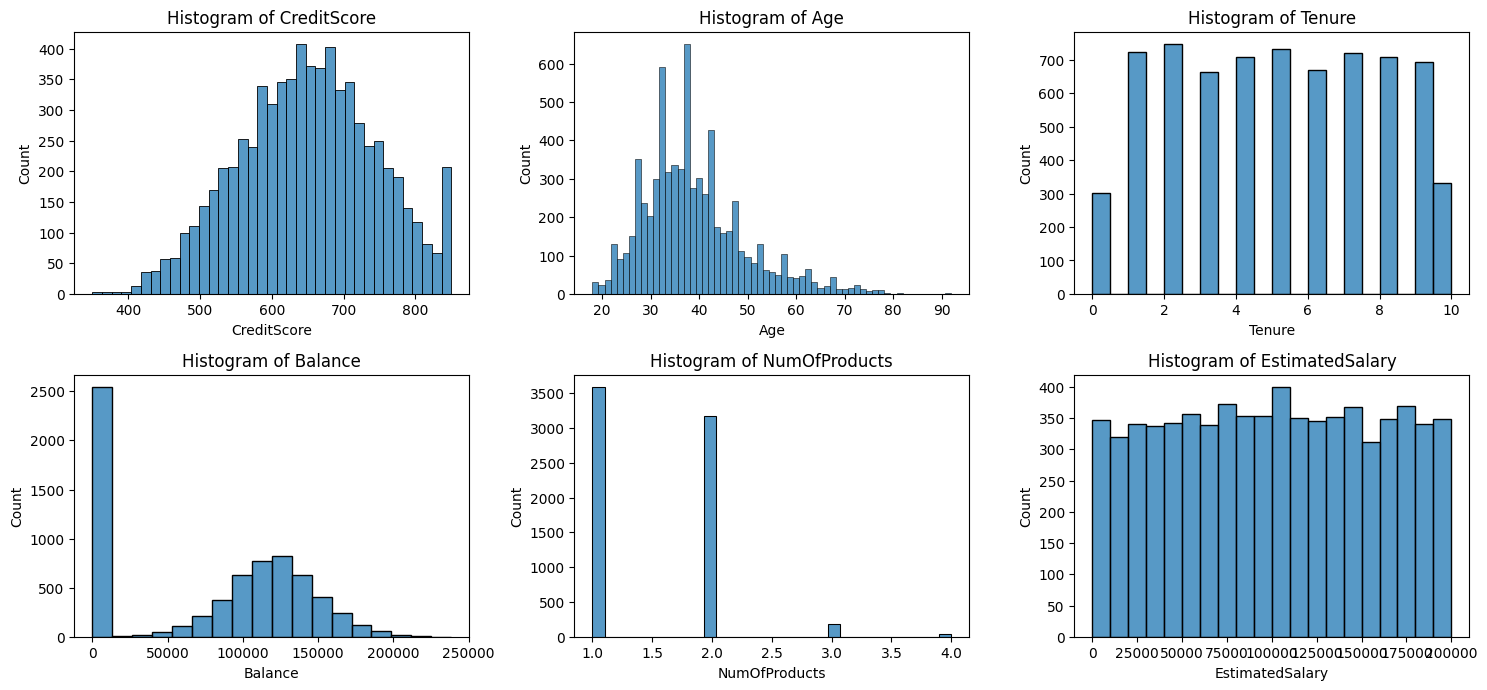

In [17]:
# Create a histrogram for each numerical attribute to check

df = train_clean
attributes=['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x=df[attribute])
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()


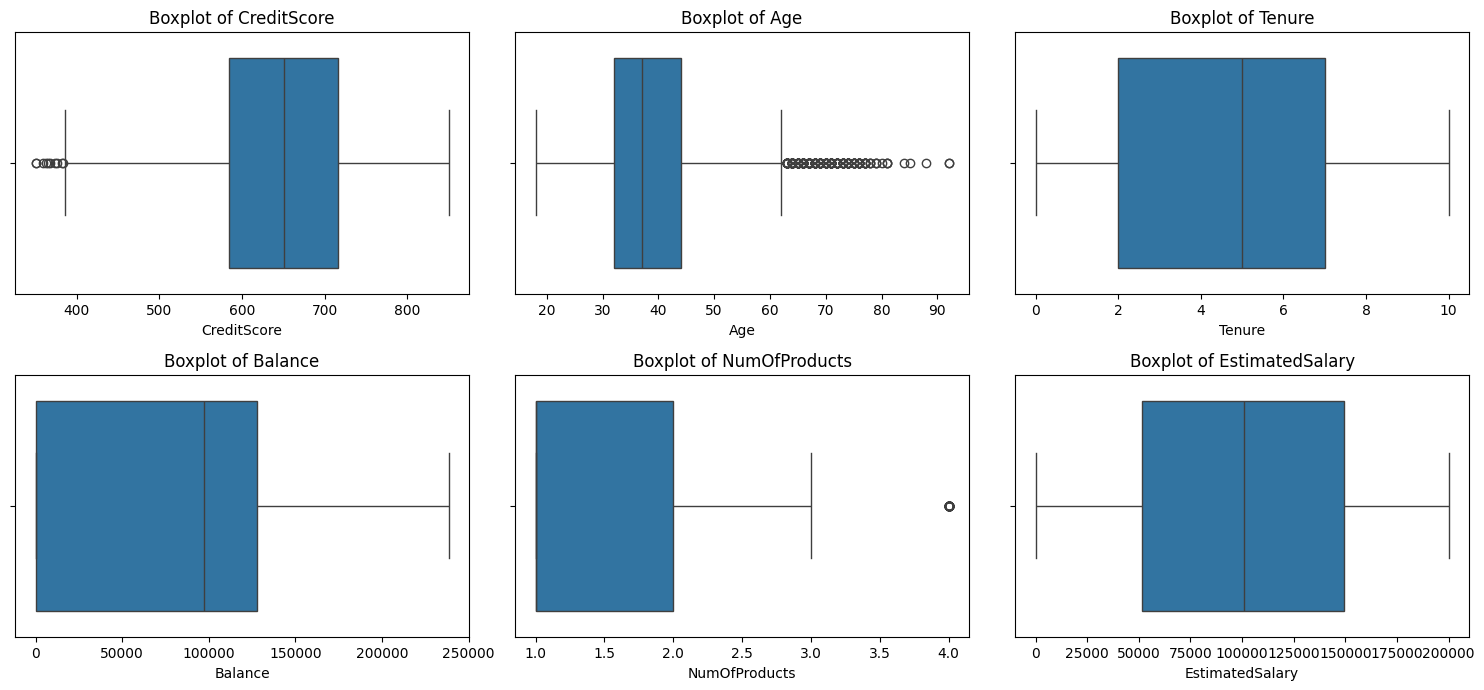

In [18]:
# Create a boxplot for each numerical attribute to check

df = train_clean
attributes=['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[attribute])
    plt.title(f'Boxplot of {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()


### Check for class imbalance problem

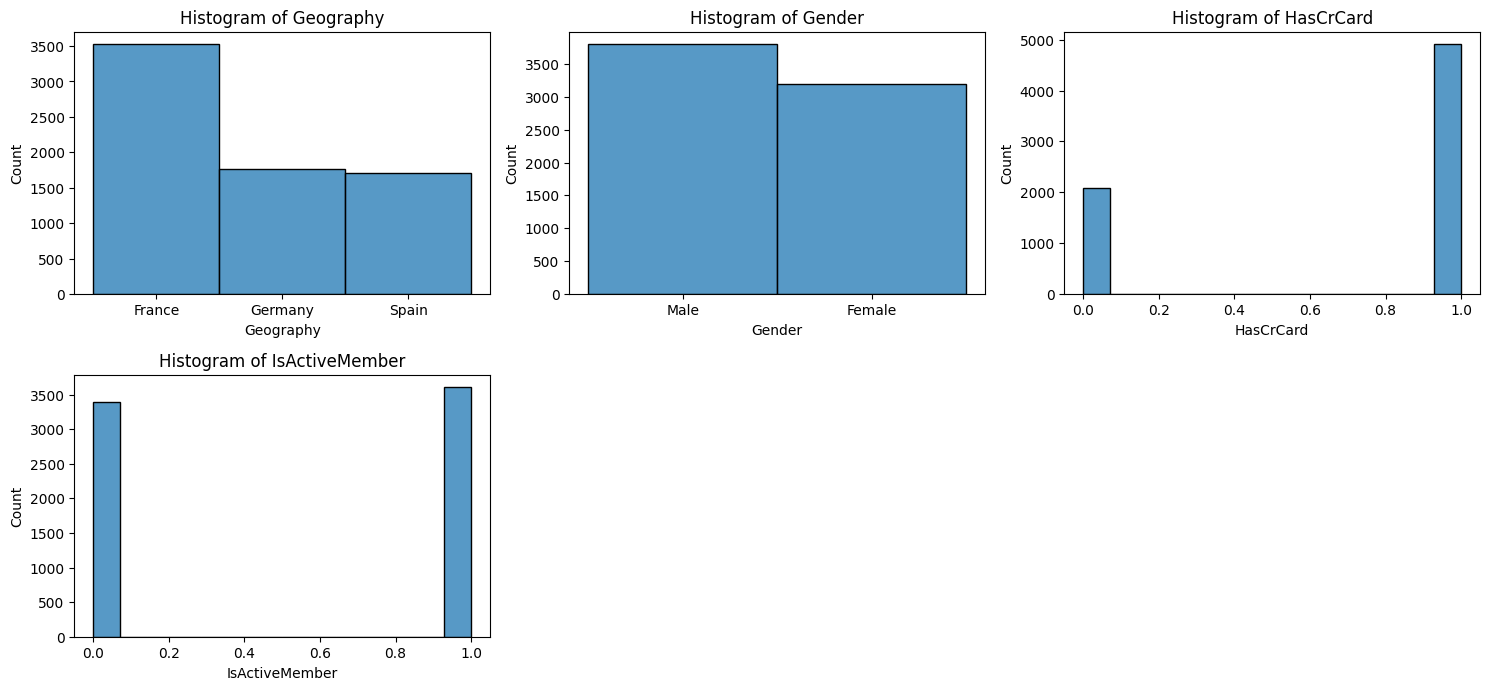

In [19]:
df = train_clean
attributes=['Geography', 'Gender','HasCrCard','IsActiveMember']

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x=df[attribute])
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()

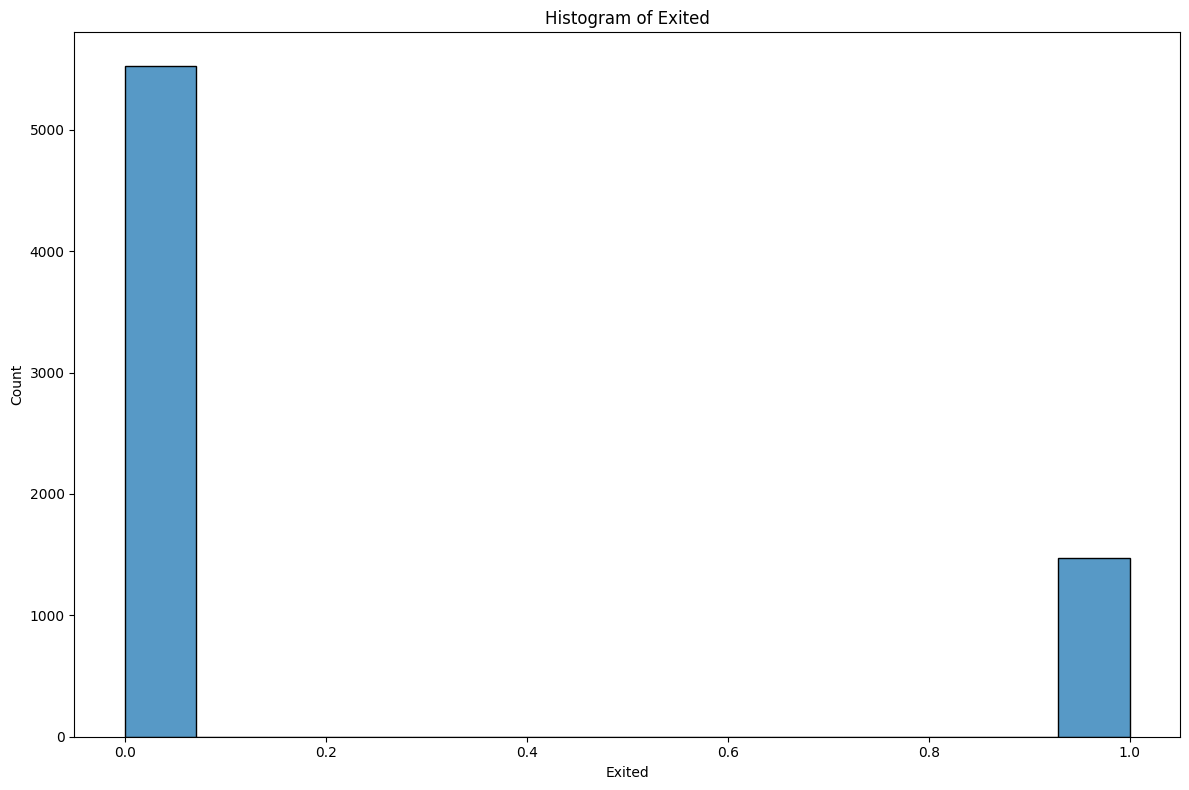

In [20]:
sns.histplot(x=y_train['Exited'])
plt.title(f'Histogram of Exited')
plt.xlabel('Exited')

plt.tight_layout()
plt.show()


In [21]:
print(df["NumOfProducts"].value_counts(normalize=True))
print(df["Geography"].value_counts(normalize=True))
print(df["Gender"].value_counts(normalize=True))
print(df["HasCrCard"].value_counts(normalize=True))
print(df["IsActiveMember"].value_counts(normalize=True))
print(y_train["Exited"].value_counts(normalize=True))

NumOfProducts
1    0.512784
2    0.454221
3    0.026710
4    0.006285
Name: proportion, dtype: float64
Geography
France     0.503500
Germany    0.252678
Spain      0.243822
Name: proportion, dtype: float64
Gender
Male      0.543065
Female    0.456935
Name: proportion, dtype: float64
HasCrCard
1.0    0.701186
0.0    0.298814
Name: proportion, dtype: float64
IsActiveMember
1.0    0.515783
0.0    0.484217
Name: proportion, dtype: float64
Exited
0    0.789459
1    0.210541
Name: proportion, dtype: float64


### Handling categorical variables

In [22]:
# For Geography and Gender
train_clean1=train_clean
train_clean1 =pd.get_dummies(train_clean1, columns=['Geography', 'Gender'],drop_first = True)

### Feature Normalization (Skip for decision tree)

 ### Feature discretization (Skip for decision tree)

### Correlation analysis

                   CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore           1.000000 -0.009043  0.006916  0.006792       0.004160   
Age                  -0.009043  1.000000 -0.012215  0.031575      -0.028420   
Tenure                0.006916 -0.012215  1.000000  0.001790       0.013047   
Balance               0.006792  0.031575  0.001790  1.000000      -0.304742   
NumOfProducts         0.004160 -0.028420  0.013047 -0.304742       1.000000   
HasCrCard            -0.016471 -0.019631  0.029688 -0.012452      -0.001909   
IsActiveMember        0.010504  0.088621 -0.029435 -0.007277       0.004322   
EstimatedSalary      -0.001997 -0.009436  0.014493  0.000191       0.016727   
Geography_Germany     0.004172  0.047250  0.003127  0.401869      -0.022181   
Geography_Spain       0.001803 -0.007798  0.000973 -0.134981       0.011557   
Gender_Male          -0.001482 -0.029491  0.016084  0.010837      -0.024935   

                   HasCrCard  IsActiveMember  Estim

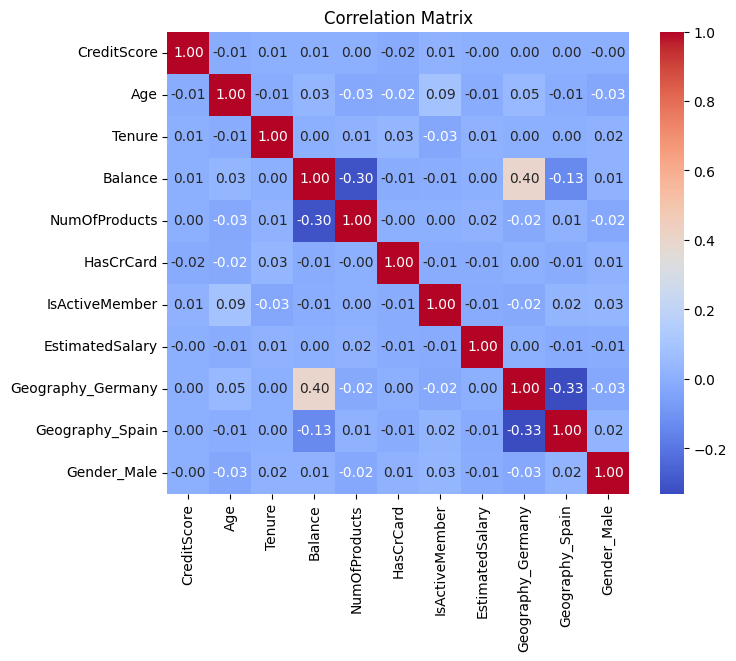

In [23]:
df = train_clean1

correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

### Feature Selection

In [24]:
train_clean1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
2490,714,28.0,6,122724.37,1,1.0,1.0,67057.27,False,False,True
9922,757,36.0,1,65349.71,1,0.0,0.0,64539.64,True,False,True
8119,577,28.0,7,0.00,1,1.0,0.0,143274.41,False,True,True
3468,538,42.0,1,98548.62,2,0.0,1.0,94047.75,True,False,False
7742,441,60.0,1,140614.15,1,0.0,1.0,174381.23,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1176,719,39.0,5,0.00,2,1.0,0.0,145759.70,False,True,True
8448,765,33.0,5,84557.82,1,1.0,1.0,69039.43,False,True,False
2935,631,33.0,7,0.00,1,1.0,1.0,58043.02,False,False,True


In [25]:
# Select feature that are useful
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary', 'Geography_Germany','Geography_Spain','Gender_Male' ]
X_train=train_clean1 [features]

## Modelling (Decision Tree)

### If use Defalut Hyperparameter

In [26]:
# Build the decision tree model based on defalut hyperparameter settings to see the CV result
model = DecisionTreeClassifier(criterion='entropy')
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(f'CV: {cv_scores.mean()}')

CV: 0.7896013051901702


### If find the best Hyperparameter

In [27]:
model = DecisionTreeClassifier(criterion='entropy')

try_grid = {
    'max_depth': np.arange(1,20,1),
    'min_samples_split': [2, 5, 10,15],
    'max_leaf_nodes':np.arange(1,100,5),
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_model = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), param_grid=try_grid, cv=kfold)

grid_model.fit(X_train, y_train)

# Print the best parameters and best accuracy score
print("Best Parameters:", grid_model.best_params_)

print("Best Cross-Validation Score:", grid_model.best_score_)

Best Parameters: {'max_depth': np.int64(8), 'max_leaf_nodes': np.int64(41), 'min_samples_split': 2}
Best Cross-Validation Score: 0.8538773325175895


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
380 fits failed out of a total of 7600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
380 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [28]:
# Fit a new model with the training dataset and the best parameter values
best_model = grid_model.best_estimator_
best_model.fit(X_train, y_train)

# Evalute the cross validation result
score_cv = cross_val_score(best_model, X_train, y_train, cv=kfold)
print("CV",score_cv.mean(),"\n")

CV 0.8538773325175895 



## Evaluation & Final Model (Decision Tree)

### Handle the test set data (same method as handle train set)

In [29]:
X_test.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,,
3557,15651823,Nkemjika,590,France,Female,60.0,6,147751.75,1,1.0,0.0,88206.04
5893,15669219,Wilson,588,Germany,Male,35.0,3,104356.38,1,1.0,0.0,94498.82
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52
4223,15627847,Woronoff,850,France,Male,40.0,6,0.00,1,1.0,0.0,136985.08
4891,15797113,Bevan,552,Spain,Female,34.0,4,0.00,2,1.0,0.0,140286.69


In [30]:
# Drop column
test_clean = X_test.drop(columns=['CustomerId','Surname'])

In [31]:
# Deal with missing value
test_clean.fillna({'CreditScore':train_clean['CreditScore'].mean()}, inplace= True)
test_clean.fillna({'Geography':train_clean['Geography'].mode()[0]}, inplace=True)
test_clean.fillna({'Gender':train_clean['Gender'].mode()[0]}, inplace=True)
test_clean.fillna({'Age':train_clean['Age'].mean()}, inplace= True)
test_clean.fillna({'Tenure':train_clean['Tenure'].mode()[0]}, inplace=True)
test_clean.fillna({'Balance':train_clean['Balance'].mean()}, inplace= True)
test_clean.fillna({'NumOfProducts':train_clean['NumOfProducts'].mode()[0]}, inplace=True)
test_clean.fillna({'HasCrCard':train_clean['HasCrCard'].mode()[0]}, inplace=True)
test_clean.fillna({'IsActiveMember':train_clean['IsActiveMember'].mode()[0]}, inplace=True)
test_clean.fillna({'EstimatedSalary':train_clean['EstimatedSalary'].mean()}, inplace= True)

In [32]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 3557 to 6629
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      3001 non-null   int64  
 1   Geography        3001 non-null   object 
 2   Gender           3001 non-null   object 
 3   Age              3001 non-null   float64
 4   Tenure           3001 non-null   int64  
 5   Balance          3001 non-null   float64
 6   NumOfProducts    3001 non-null   int64  
 7   HasCrCard        3001 non-null   float64
 8   IsActiveMember   3001 non-null   float64
 9   EstimatedSalary  3001 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 257.9+ KB


In [33]:
# Handling categorical variable for Geography and Gender
test_clean =pd.get_dummies(test_clean, columns=['Geography', 'Gender'],drop_first = True)

In [34]:
test_clean

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,
3557,590,60.0,6,147751.75,1,1.0,0.0,88206.04,False,False,False
5893,588,35.0,3,104356.38,1,1.0,0.0,94498.82,True,False,True
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,True,False,True
4223,850,40.0,6,0.00,1,1.0,0.0,136985.08,False,False,True
4891,552,34.0,4,0.00,2,1.0,0.0,140286.69,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
3733,722,46.0,6,0.00,1,1.0,1.0,93917.68,False,False,True
8346,568,46.0,3,0.00,2,1.0,1.0,29372.62,False,True,False
8663,510,44.0,4,123070.89,1,1.0,0.0,28461.29,True,False,False


In [35]:
# Select feature that are useful
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary', 'Geography_Germany','Geography_Spain','Gender_Male' ]
X_test=test_clean [features]

### Evaluate the model using the test set

In [36]:
y_pred = best_model.predict(X_test)
print("Accuracy from 30% test data:",accuracy_score(y_test, y_pred),"\n")
print("Confusion matrix from 30% test data:\n",confusion_matrix(y_test, y_pred),"\n")
print("Classification_report:\n", classification_report(y_test, y_pred))

Accuracy from 30% test data: 0.8713762079306898 

Confusion matrix from 30% test data:
 [[2362   75]
 [ 311  253]] 

Classification_report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2437
           1       0.77      0.45      0.57       564

    accuracy                           0.87      3001
   macro avg       0.83      0.71      0.75      3001
weighted avg       0.86      0.87      0.86      3001



In [37]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

print("AUC Score:", auc_score)

AUC Score: 0.8439723587598984


Text(0.5, 1.0, 'Feature Importance')

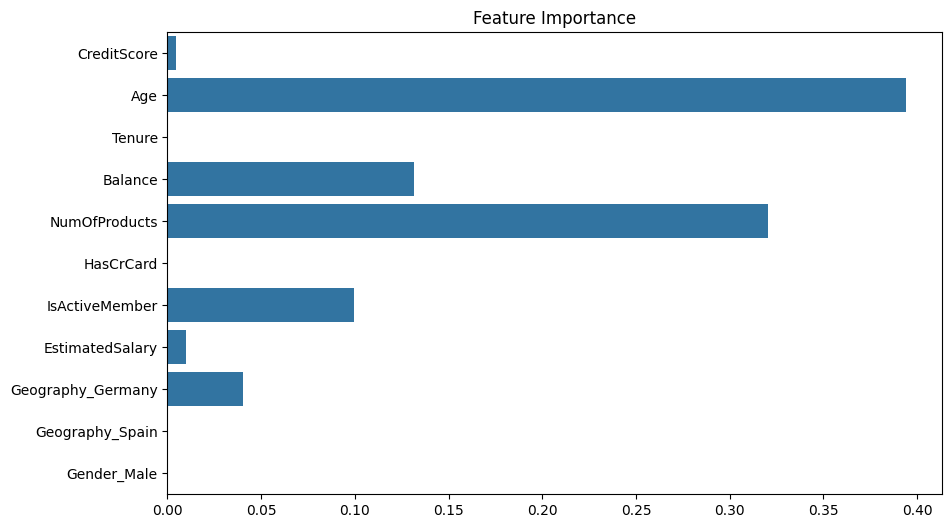

In [38]:
# Feature importance
best_model.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(x=best_model.feature_importances_, y=features)
plt.title('Feature Importance')

### Final Model

In [39]:
combined_X = pd.concat([X_train, X_test], axis=0)
combined_y = pd.concat([y_train, y_test], axis=0)

In [40]:
# Fit the Final model with all training data and testing data

final_model = grid_model.best_estimator_
final_model.fit(combined_X, combined_y)
fig = plt.figure(figsize=(200,100))
_ = tree.plot_tree(final_model,
                   feature_names = features,
                   class_names = [' Exited','Not Exited'],
                   filled=True)

Output hidden; open in https://colab.research.google.com to view.

# Logistic Regression Method

### Split the data into train and test

In [41]:
full = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')
full.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [42]:
features = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
            'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
target = ['Exited']

In [43]:
X = full [features]
y = full [target]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 25)

## Data Understanding and Preparation (Logistic Regression)

In [45]:
X_train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,,
2490,15776824,Rossi,714,France,Male,28.0,6,122724.37,1,1.0,1.0,67057.27
9922,15643575,Evseev,757,Germany,Male,36.0,1,65349.71,1,0.0,0.0,64539.64
8119,15720203,Arcuri,577,Spain,Male,28.0,7,0.00,1,1.0,0.0,143274.41
3468,15771509,Hirst,538,Germany,Female,42.0,1,98548.62,2,0.0,1.0,94047.75
7742,15634501,Wei,441,France,Male,60.0,1,140614.15,1,0.0,1.0,174381.23


### Drop unnessary column

In [46]:
#Find the column that are not helpful for prediction (those have too many unique value and don't have much meaning)
X_train.nunique()

,0
CustomerId,7001
Surname,2443
CreditScore,451
Geography,3
Gender,2
Age,71
Tenure,11
Balance,4459
NumOfProducts,4
HasCrCard,2


In [47]:
#drop unnessary column (we keep 'Balance' and 'EstimatedSalary' because the unique value is due to its discrete numercial value)
train_clean = X_train.drop(columns=['CustomerId','Surname'])

### Handle missing value

In [48]:
# Check for missing value, datatype (numercial or categorical variable)
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7001 entries, 2490 to 8511
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7001 non-null   int64  
 1   Geography        7001 non-null   object 
 2   Gender           7001 non-null   object 
 3   Age              7001 non-null   float64
 4   Tenure           7001 non-null   int64  
 5   Balance          7001 non-null   float64
 6   NumOfProducts    7001 non-null   int64  
 7   HasCrCard        7001 non-null   float64
 8   IsActiveMember   7000 non-null   float64
 9   EstimatedSalary  7001 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 601.6+ KB


In [49]:
# Deal with missing value
train_clean.fillna({'CreditScore':train_clean['CreditScore'].mean()}, inplace= True)
train_clean.fillna({'Geography':train_clean['Geography'].mode()[0]}, inplace=True)
train_clean.fillna({'Gender':train_clean['Gender'].mode()[0]}, inplace=True)
train_clean.fillna({'Age':train_clean['Age'].mean()}, inplace= True)
train_clean.fillna({'Tenure':train_clean['Tenure'].mode()[0]}, inplace=True)
train_clean.fillna({'Balance':train_clean['Balance'].mean()}, inplace= True)
train_clean.fillna({'NumOfProducts':train_clean['NumOfProducts'].mode()[0]}, inplace=True)
train_clean.fillna({'HasCrCard':train_clean['HasCrCard'].mode()[0]}, inplace=True)
train_clean.fillna({'IsActiveMember':train_clean['IsActiveMember'].mode()[0]}, inplace=True)
train_clean.fillna({'EstimatedSalary':train_clean['EstimatedSalary'].mean()}, inplace= True)

In [50]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7001 entries, 2490 to 8511
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7001 non-null   int64  
 1   Geography        7001 non-null   object 
 2   Gender           7001 non-null   object 
 3   Age              7001 non-null   float64
 4   Tenure           7001 non-null   int64  
 5   Balance          7001 non-null   float64
 6   NumOfProducts    7001 non-null   int64  
 7   HasCrCard        7001 non-null   float64
 8   IsActiveMember   7001 non-null   float64
 9   EstimatedSalary  7001 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 601.6+ KB


### Remove duplicate records

In [51]:
train_clean.drop_duplicates

<bound method DataFrame.drop_duplicates of            CreditScore Geography  Gender   Age  Tenure    Balance  \
RowNumber                                                           
2490               714    France    Male  28.0       6  122724.37   
9922               757   Germany    Male  36.0       1   65349.71   
8119               577     Spain    Male  28.0       7       0.00   
3468               538   Germany  Female  42.0       1   98548.62   
7742               441    France    Male  60.0       1  140614.15   
...                ...       ...     ...   ...     ...        ...   
1176               719     Spain    Male  39.0       5       0.00   
8448               765     Spain  Female  33.0       5   84557.82   
2935               631    France    Male  33.0       7       0.00   
6619               636   Germany  Female  29.0       3   97325.15   
8511               550    France  Female  40.0       8  150490.32   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
RowNumber                                                             
2490                   1        1.0             1.0         67057.27  
9922                   1        0.0             0.0         64539.64  
8119                   1        1.0             0.0        143274.41  
3468                   2        0.0             1.0         94047.75  
7742                   1        0.0             1.0        174381.23  
...                  ...        ...             ...              ...  
1176                   2        1.0             0.0        145759.70  
8448                   1        1.0             1.0         69039.43  
2935                   1        1.0             1.0         58043.02  
6619                   1        0.0             1.0        131924.38  
8511                   1        0.0             0.0        166468.21  

[7001 rows x 10 columns]>

### Check for Skewness and Outliers

In [52]:
#check the distribution of the attribute that are represent in numerical value
train_clean.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,649.930296,39.030000,4.999143,76508.436073,1.526496,0.701186,0.515783,100508.466872
std,95.753885,10.563527,2.892848,62614.239884,0.583504,0.457771,0.499787,57270.183788
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51695.410000
50%,651.000000,37.000000,5.000000,97473.870000,1.000000,1.000000,1.000000,100862.540000
75%,716.000000,44.000000,7.000000,128015.830000,2.000000,1.000000,1.000000,149370.930000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000


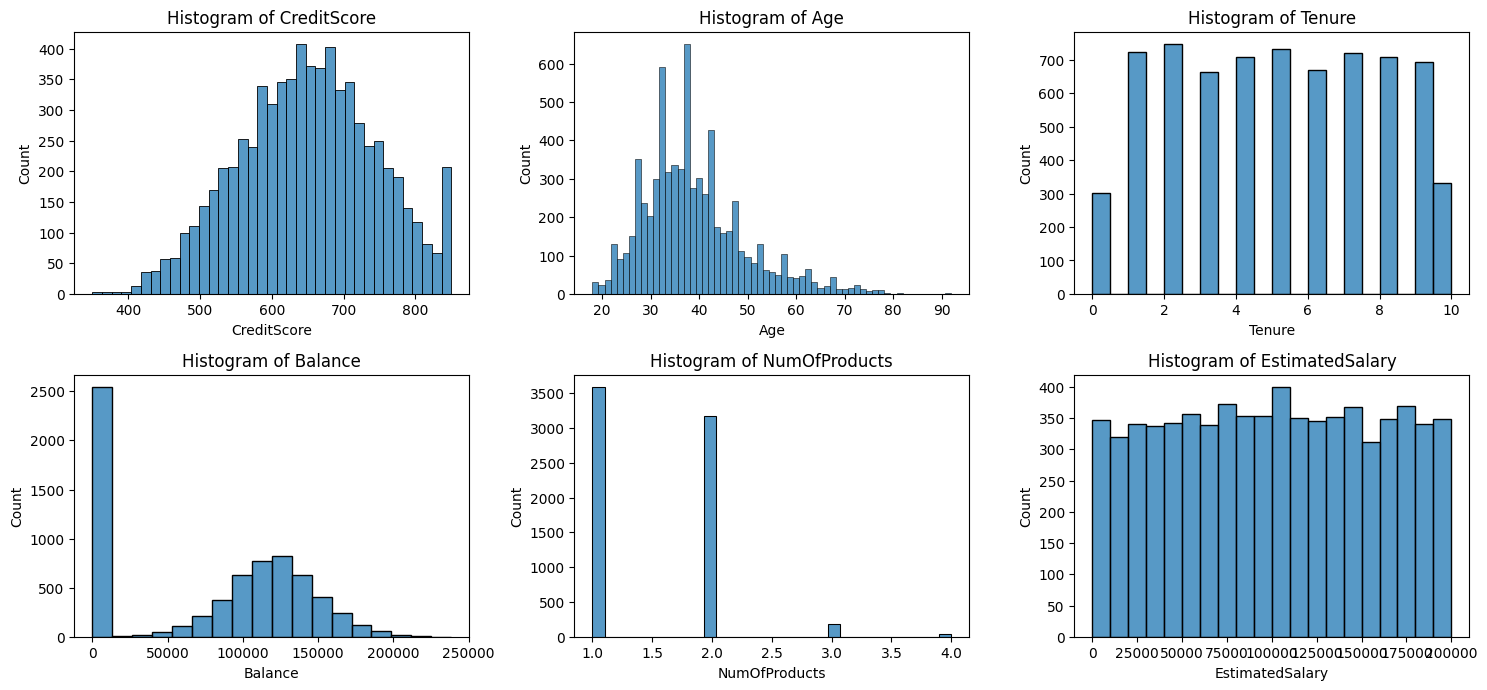

In [53]:
# Create a histrogram for each numerical attribute to check

df = train_clean
attributes=['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x=df[attribute])
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()


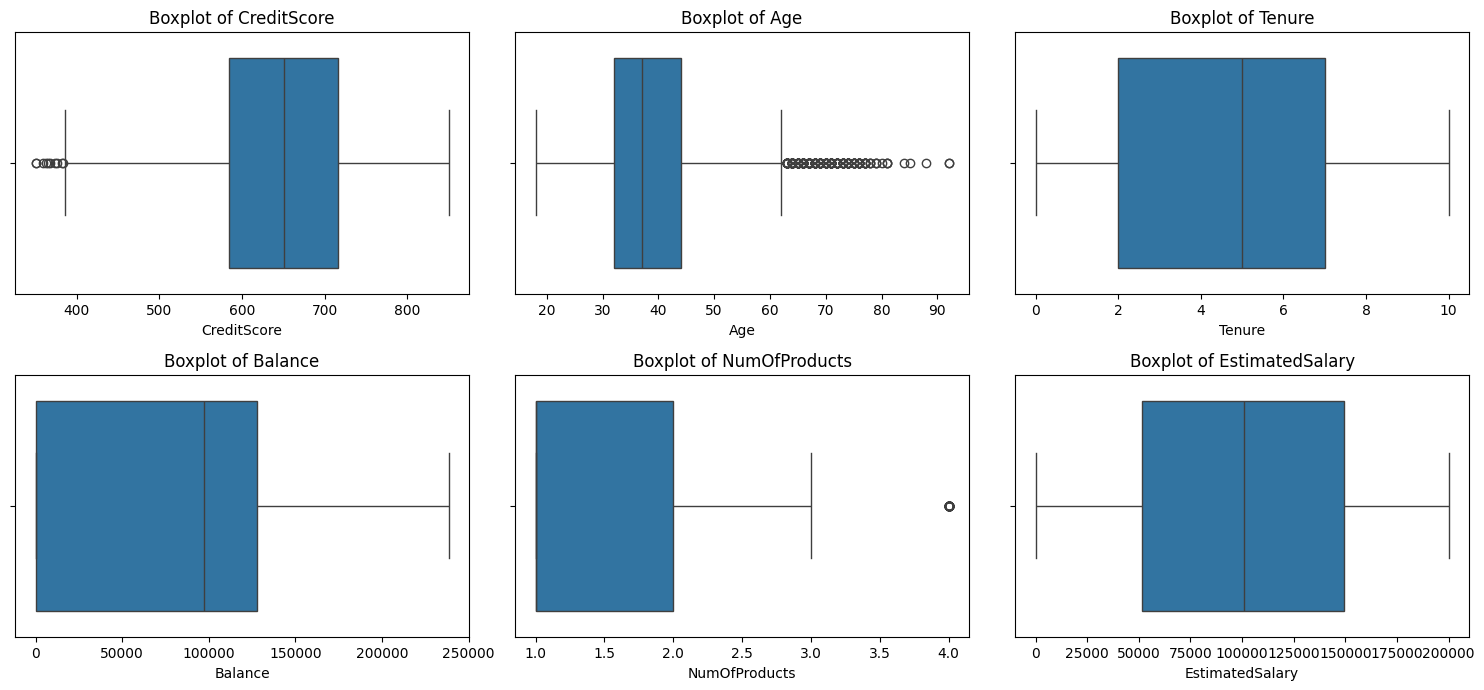

In [54]:
# Create a boxplot for each numerical attribute to check

df = train_clean
attributes=['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[attribute])
    plt.title(f'Boxplot of {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()


### Check for class imbalance problem

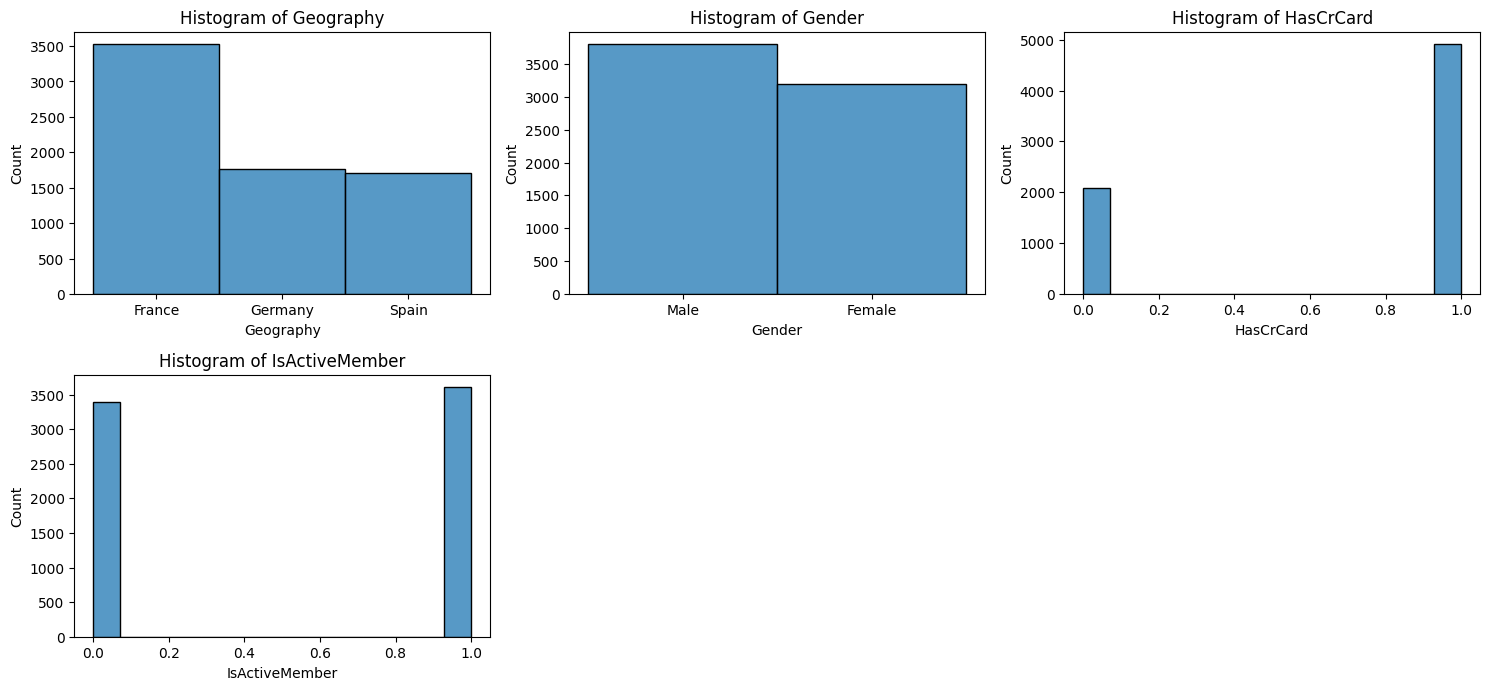

In [55]:
df = train_clean
attributes=['Geography', 'Gender','HasCrCard','IsActiveMember']

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x=df[attribute])
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()

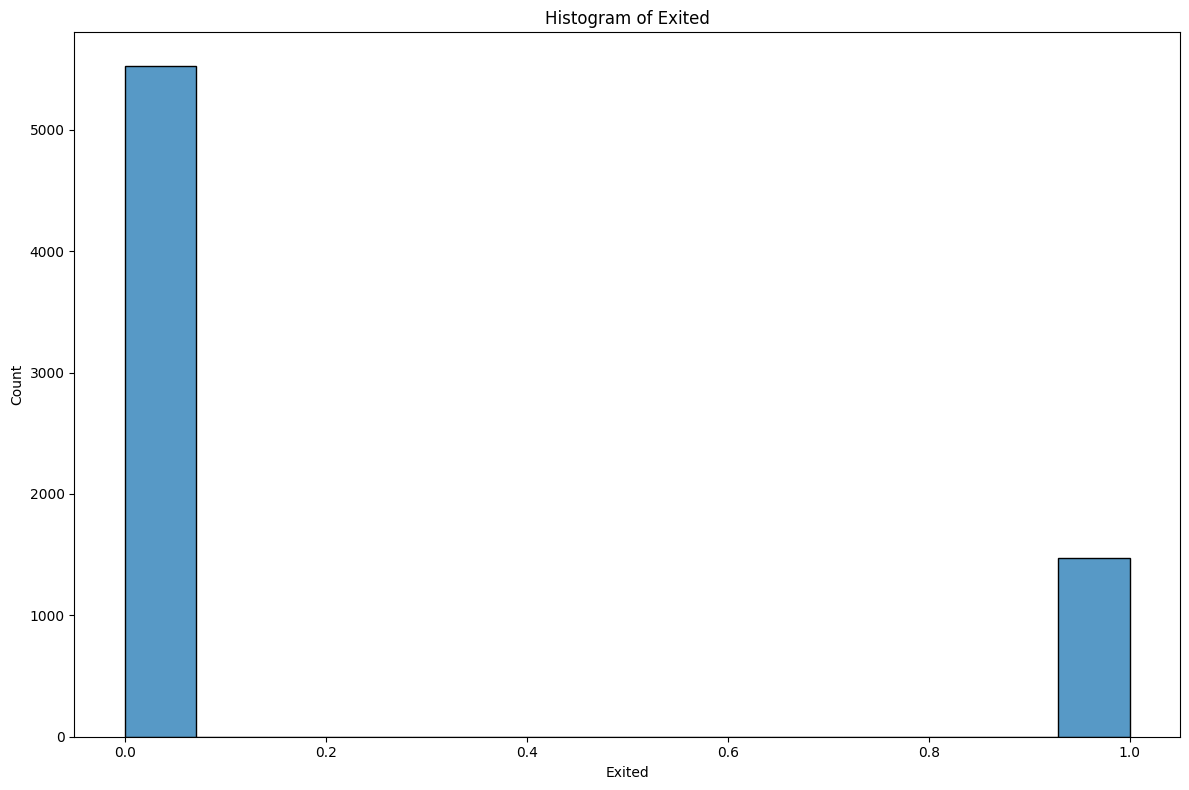

In [56]:
sns.histplot(x=y_train['Exited'])
plt.title(f'Histogram of Exited')
plt.xlabel('Exited')

plt.tight_layout()
plt.show()

In [57]:
print(df["NumOfProducts"].value_counts(normalize=True))
print(df["Geography"].value_counts(normalize=True))
print(df["Gender"].value_counts(normalize=True))
print(df["HasCrCard"].value_counts(normalize=True))
print(df["IsActiveMember"].value_counts(normalize=True))
print(y_train["Exited"].value_counts(normalize=True))



NumOfProducts
1    0.512784
2    0.454221
3    0.026710
4    0.006285
Name: proportion, dtype: float64
Geography
France     0.503500
Germany    0.252678
Spain      0.243822
Name: proportion, dtype: float64
Gender
Male      0.543065
Female    0.456935
Name: proportion, dtype: float64
HasCrCard
1.0    0.701186
0.0    0.298814
Name: proportion, dtype: float64
IsActiveMember
1.0    0.515783
0.0    0.484217
Name: proportion, dtype: float64
Exited
0    0.789459
1    0.210541
Name: proportion, dtype: float64


### Handling categorical variables

In [58]:
# For Geography and Gender
train_clean1=train_clean
train_clean1 =pd.get_dummies(train_clean1, columns=['Geography', 'Gender'],drop_first = True)

### Transformation (For 'Age')

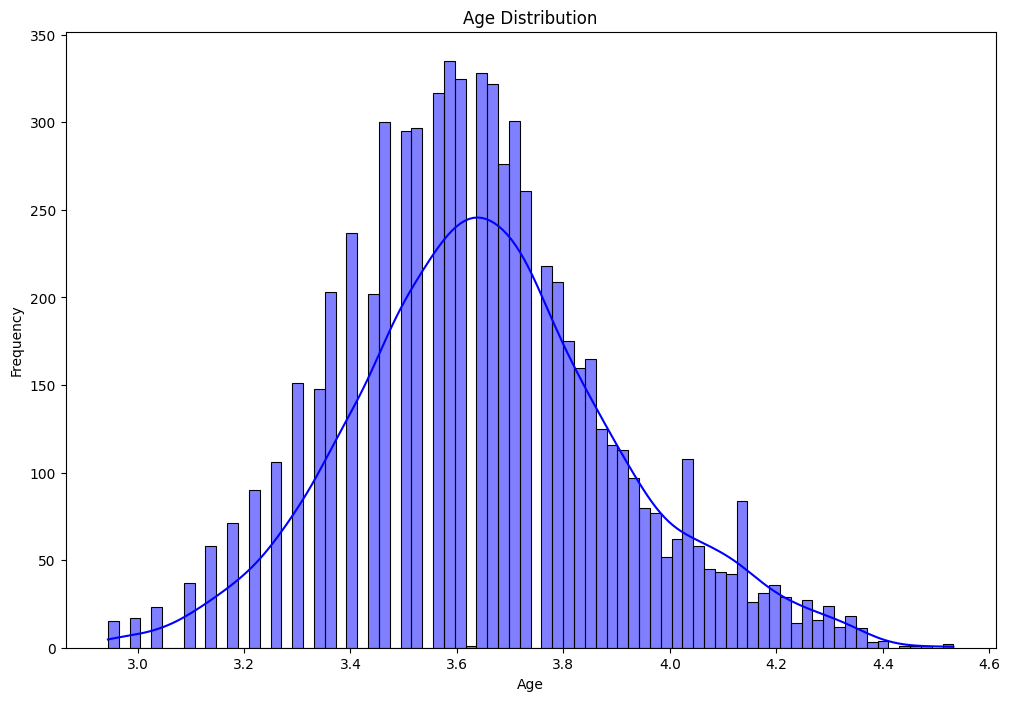

In [59]:
# Apply log transformation for Age
train_clean1['Log_Age'] = np.log(train_clean1['Age'] + 1)

sns.histplot(train_clean1['Log_Age'], bins=78, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [60]:
train_clean1 = train_clean1.drop('Age', axis=1)

### Handling Balance (zero-inflated distribution)(For Logistic regression)

In [61]:
# Yeo-johnson transformation on non-zero balances
pt = PowerTransformer(method='yeo-johnson')

# Fit the transformer only on non-zero values
non_zero_balance = train_clean1['Balance'][train_clean1['Balance'] > 0].values.reshape(-1, 1)
pt.fit(non_zero_balance)

# Transform the balance, keeping zeros as they are
train_clean1['Transformed_Balance'] = train_clean1['Balance']  # Start with original values
train_clean1.loc[train_clean1['Balance'] > 0, 'Transformed_Balance'] = pt.transform(non_zero_balance)


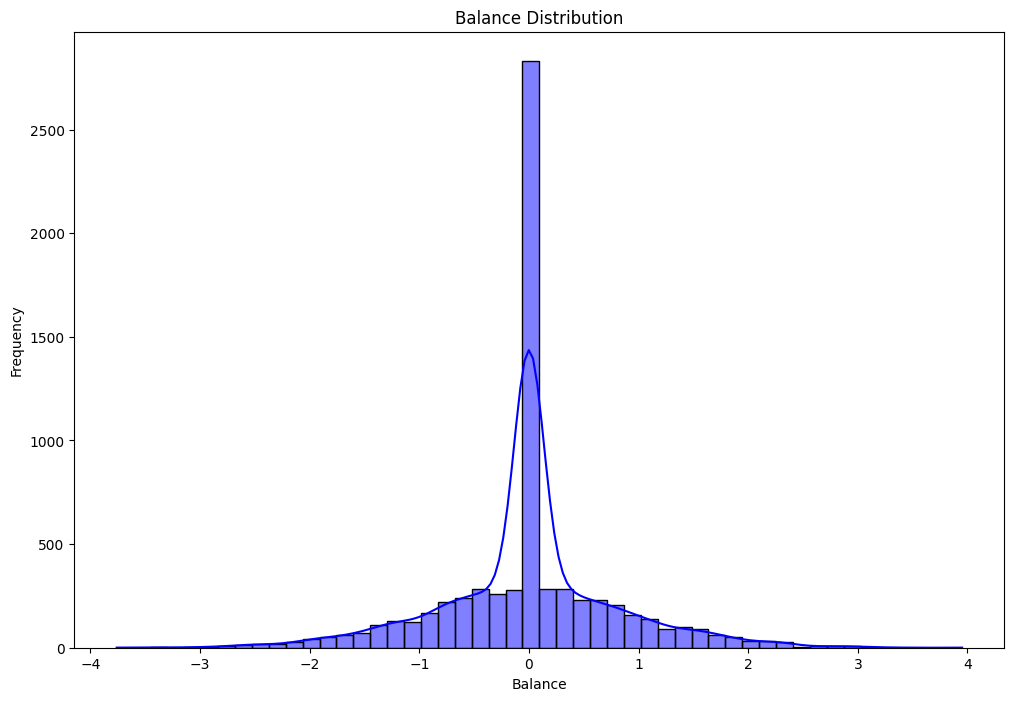

In [62]:
sns.histplot(train_clean1['Transformed_Balance'], bins=50, kde=True, color='blue')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [63]:
train_clean1 = train_clean1.drop('Balance', axis=1)

In [64]:
train_clean1

,CreditScore,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Log_Age,Transformed_Balance
RowNumber,,,,,,,,,,,
2490,714,6,1,1.0,1.0,67057.27,False,False,True,3.367296,0.082403
9922,757,1,1,0.0,0.0,64539.64,True,False,True,3.610918,-1.802334
8119,577,7,1,1.0,0.0,143274.41,False,True,True,3.367296,0.000000
3468,538,1,2,0.0,1.0,94047.75,True,False,False,3.761200,-0.715661
7742,441,1,1,0.0,1.0,174381.23,False,False,True,4.110874,0.675845
...,...,...,...,...,...,...,...,...,...,...,...
1176,719,5,2,1.0,0.0,145759.70,False,True,True,3.688879,0.000000
8448,765,5,1,1.0,1.0,69039.43,False,True,False,3.526361,-1.175098
2935,631,7,1,1.0,1.0,58043.02,False,False,True,3.526361,0.000000


### Feature Normalization (Do for Logistic Regression)

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_clean1[['CreditScore', 'Tenure','NumOfProducts', 'EstimatedSalary', 'Log_Age','Transformed_Balance']])

### Correlation analysis

                     CreditScore    Tenure  NumOfProducts  HasCrCard  \
CreditScore             1.000000  0.006916       0.004160  -0.016471   
Tenure                  0.006916  1.000000       0.013047   0.029688   
NumOfProducts           0.004160  0.013047       1.000000  -0.001909   
HasCrCard              -0.016471  0.029688      -0.001909   1.000000   
IsActiveMember          0.010504 -0.029435       0.004322  -0.011227   
EstimatedSalary        -0.001997  0.014493       0.016727  -0.011605   
Geography_Germany       0.004172  0.003127      -0.022181   0.004023   
Geography_Spain         0.001803  0.000973       0.011557  -0.010119   
Gender_Male            -0.001482  0.016084      -0.024935   0.010707   
Log_Age                -0.011180 -0.012890      -0.028053  -0.019830   
Transformed_Balance     0.006094  0.009835      -0.002586   0.007358   

                     IsActiveMember  EstimatedSalary  Geography_Germany  \
CreditScore                0.010504        -0.001997        

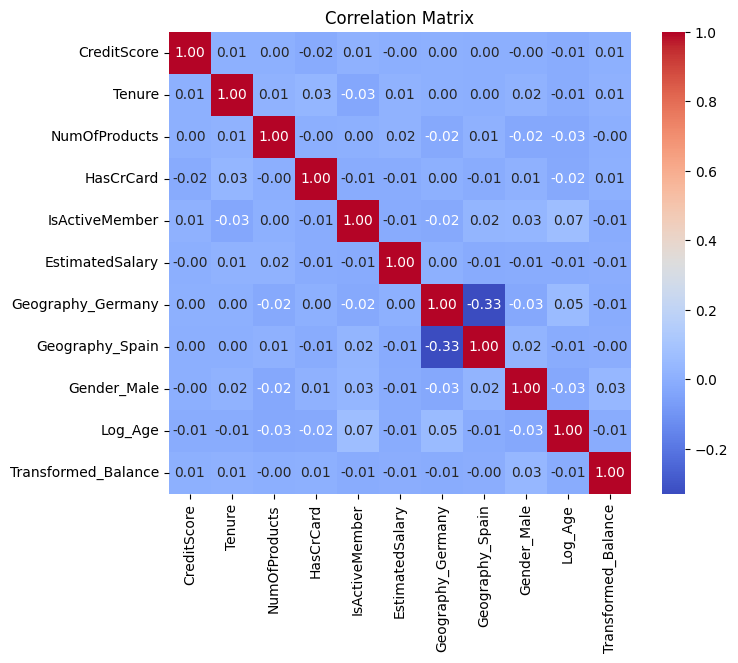

In [66]:
df = train_clean1

correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

### Feature Selection

In [67]:
X_train=train_clean1
X_train

,CreditScore,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Log_Age,Transformed_Balance
RowNumber,,,,,,,,,,,
2490,714,6,1,1.0,1.0,67057.27,False,False,True,3.367296,0.082403
9922,757,1,1,0.0,0.0,64539.64,True,False,True,3.610918,-1.802334
8119,577,7,1,1.0,0.0,143274.41,False,True,True,3.367296,0.000000
3468,538,1,2,0.0,1.0,94047.75,True,False,False,3.761200,-0.715661
7742,441,1,1,0.0,1.0,174381.23,False,False,True,4.110874,0.675845
...,...,...,...,...,...,...,...,...,...,...,...
1176,719,5,2,1.0,0.0,145759.70,False,True,True,3.688879,0.000000
8448,765,5,1,1.0,1.0,69039.43,False,True,False,3.526361,-1.175098
2935,631,7,1,1.0,1.0,58043.02,False,False,True,3.526361,0.000000


## Modelling (Logistic Regression)

In [68]:
#Logistic Regression model with L1 regularization
model = LogisticRegression(penalty='l1',solver='liblinear',random_state=25)

# Hyperparameter tuning for C
param_grid = {'C': [10**i for i in np.arange(-1, 2, 0.1)]}
grid_search = GridSearchCV(model, param_grid, cv=5,scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train.values.ravel())
print(f"Best C: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best C: {'C': np.float64(0.25118864315095796)}
Best score: -0.1909720607729173


In [69]:
best_model = grid_search.best_estimator_

## Evaluation & Final Model (Logistic Regression)

### Cleaning the testing data using same method as training data

In [70]:
# Drop unnessary column
test_clean = X_test.drop(columns=['CustomerId','Surname'])

In [71]:
# Deal with missing value
test_clean.fillna({'CreditScore':train_clean['CreditScore'].mean()}, inplace= True)
test_clean.fillna({'Geography':train_clean['Geography'].mode()[0]}, inplace=True)
test_clean.fillna({'Gender':train_clean['Gender'].mode()[0]}, inplace=True)
test_clean.fillna({'Age':train_clean['Age'].mean()}, inplace= True)
test_clean.fillna({'Tenure':train_clean['Tenure'].mode()[0]}, inplace=True)
test_clean.fillna({'Balance':train_clean['Balance'].mean()}, inplace= True)
test_clean.fillna({'NumOfProducts':train_clean['NumOfProducts'].mode()[0]}, inplace=True)
test_clean.fillna({'HasCrCard':train_clean['HasCrCard'].mode()[0]}, inplace=True)
test_clean.fillna({'IsActiveMember':train_clean['IsActiveMember'].mode()[0]}, inplace=True)
test_clean.fillna({'EstimatedSalary':train_clean['EstimatedSalary'].mean()}, inplace= True)

In [72]:
# Handling categorical variables for Geography and Gender
test_clean1=test_clean

test_clean1 =pd.get_dummies(test_clean1, columns=['Geography', 'Gender'],drop_first = True)

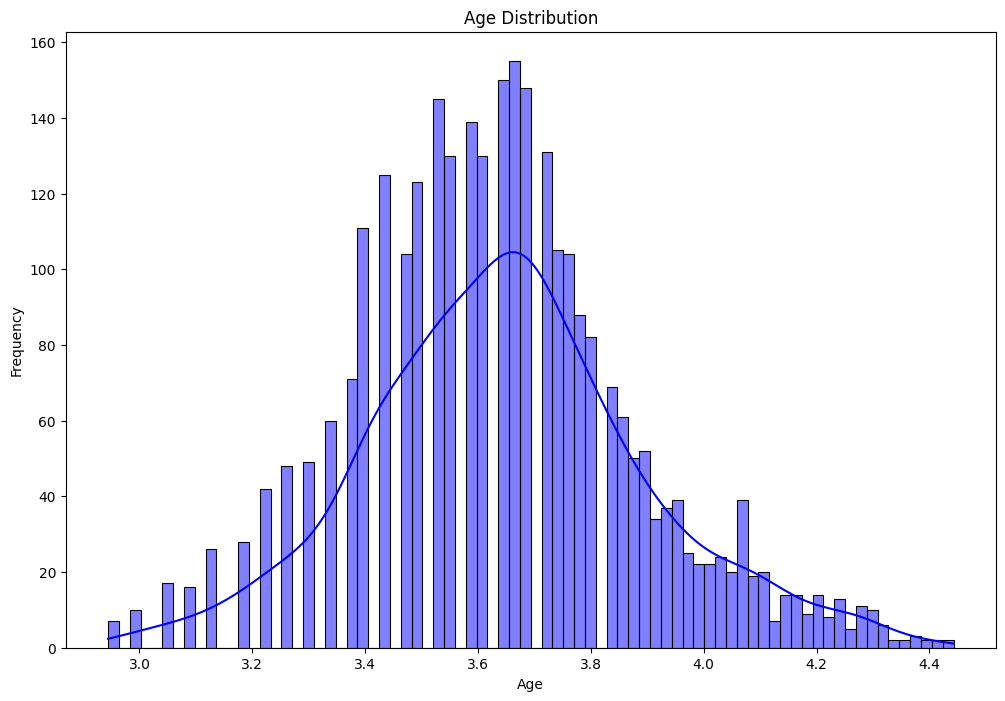

In [73]:
# Apply log transformation for Age
test_clean1['Log_Age'] = np.log(test_clean1['Age'] + 1)

sns.histplot(test_clean1['Log_Age'], bins=78, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [74]:
test_clean1 = test_clean1.drop('Age', axis=1)

In [75]:
# Yeo-johnson transformation on non-zero balances
pt = PowerTransformer(method='yeo-johnson')

# Fit the transformer only on non-zero values
non_zero_balance = test_clean1['Balance'][test_clean1['Balance'] > 0].values.reshape(-1, 1)
pt.fit(non_zero_balance)

# Transform the balance, keeping zeros as they are
test_clean1['Transformed_Balance'] = test_clean1['Balance']  # Start with original values
test_clean1.loc[test_clean1['Balance'] > 0, 'Transformed_Balance'] = pt.transform(non_zero_balance)


In [76]:
test_clean1 = test_clean1.drop('Balance', axis=1)

In [77]:
# Feature normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(test_clean1[['CreditScore', 'Tenure', 'EstimatedSalary', 'Log_Age','Transformed_Balance']])

In [78]:
X_test=test_clean1
X_test

,CreditScore,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Log_Age,Transformed_Balance
RowNumber,,,,,,,,,,,
3557,590,6,1,1.0,0.0,88206.04,False,False,False,4.110874,0.963245
5893,588,3,1,1.0,0.0,94498.82,True,False,True,3.583519,-0.484522
9999,772,3,2,1.0,0.0,92888.52,True,False,True,3.761200,-1.499971
4223,850,6,1,1.0,0.0,136985.08,False,False,True,3.713572,0.000000
4891,552,4,2,1.0,0.0,140286.69,False,True,False,3.555348,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3733,722,6,1,1.0,1.0,93917.68,False,False,True,3.850148,0.000000
8346,568,3,2,1.0,1.0,29372.62,False,True,False,3.850148,0.000000
8663,510,4,1,1.0,0.0,28461.29,True,False,False,3.806662,0.146906


### Evaluate the model using the test set

In [79]:
y_pred = best_model.predict(X_test)
print("Accuracy from 30% test data:",accuracy_score(y_test, y_pred),"\n")
print("Confusion matrix from 30% test data:\n",confusion_matrix(y_test, y_pred),"\n")
print("Classification_report:\n", classification_report(y_test, y_pred))

Accuracy from 30% test data: 0.8243918693768744 

Confusion matrix from 30% test data:
 [[2395   42]
 [ 485   79]] 

Classification_report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      2437
           1       0.65      0.14      0.23       564

    accuracy                           0.82      3001
   macro avg       0.74      0.56      0.57      3001
weighted avg       0.80      0.82      0.77      3001



In [80]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

print("AUC Score:", auc_score)

AUC Score: 0.7662382827392126


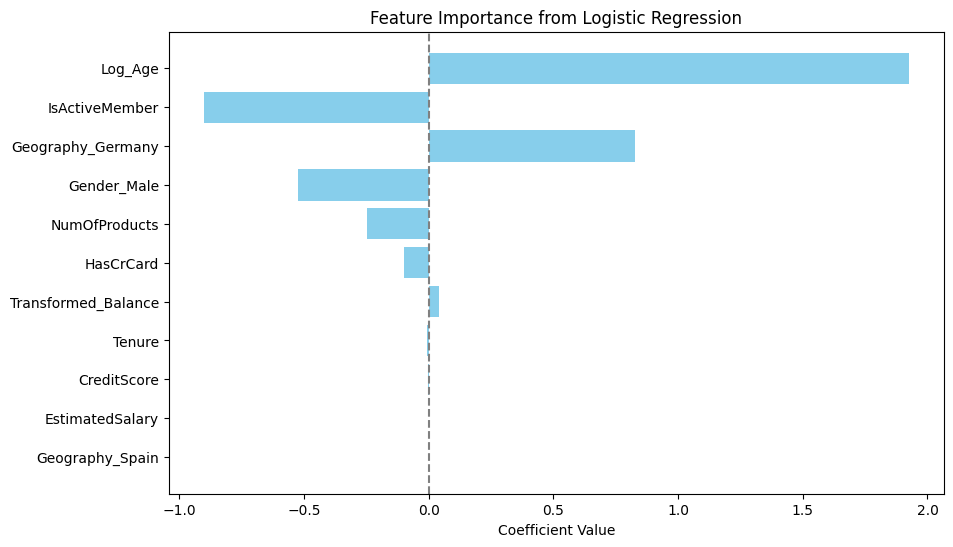

                Feature   Coefficient
7       Geography_Spain  0.000000e+00
5       EstimatedSalary -4.829759e-07
0           CreditScore -1.554946e-03
1                Tenure -7.831453e-03
10  Transformed_Balance  4.216186e-02
3             HasCrCard -1.001763e-01
2         NumOfProducts -2.473833e-01
8           Gender_Male -5.232111e-01
6     Geography_Germany  8.270744e-01
4        IsActiveMember -8.995063e-01
9               Log_Age  1.924914e+00


In [81]:
# Feature importance

feature_names = X_train.columns
coefficients = best_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance['Absolute Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance from Logistic Regression')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

print(feature_importance[['Feature', 'Coefficient']])

### Final model

In [82]:
combined_X = pd.concat([X_train, X_test], axis=0)
combined_y = pd.concat([y_train, y_test], axis=0)

In [83]:
# Fit the Final model with all training data and testing data
final_model = grid_search.best_estimator_
final_model.fit(combined_X, combined_y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=np.float64(0.25118864315095796), penalty='l1',
                   random_state=25, solver='liblinear')

# Naive bayes classifier Method

### Split the data into train and test

In [84]:
full = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')
full.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [85]:
features = ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
            'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
target = ['Exited']

In [86]:
X = full [features]
y = full [target]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 25)

## Data Understanding and Preparation (Naive Bayes)

In [88]:
X_train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,,
2490,15776824,Rossi,714,France,Male,28.0,6,122724.37,1,1.0,1.0,67057.27
9922,15643575,Evseev,757,Germany,Male,36.0,1,65349.71,1,0.0,0.0,64539.64
8119,15720203,Arcuri,577,Spain,Male,28.0,7,0.00,1,1.0,0.0,143274.41
3468,15771509,Hirst,538,Germany,Female,42.0,1,98548.62,2,0.0,1.0,94047.75
7742,15634501,Wei,441,France,Male,60.0,1,140614.15,1,0.0,1.0,174381.23


### Drop unnessary column

In [89]:
#Find the column that are not helpful for prediction (those have too many unique value and don't have much meaning)
X_train.nunique()

,0
CustomerId,7001
Surname,2443
CreditScore,451
Geography,3
Gender,2
Age,71
Tenure,11
Balance,4459
NumOfProducts,4
HasCrCard,2


In [90]:
#drop unnessary column (we keep 'Balance' and 'EstimatedSalary' because the unique value is due to its discrete numercial value)
train_clean = X_train.drop(columns=['CustomerId','Surname'])

### Handle missing value

In [91]:
# Check for missing value, datatype (numercial or categorical variable)
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7001 entries, 2490 to 8511
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7001 non-null   int64  
 1   Geography        7001 non-null   object 
 2   Gender           7001 non-null   object 
 3   Age              7001 non-null   float64
 4   Tenure           7001 non-null   int64  
 5   Balance          7001 non-null   float64
 6   NumOfProducts    7001 non-null   int64  
 7   HasCrCard        7001 non-null   float64
 8   IsActiveMember   7000 non-null   float64
 9   EstimatedSalary  7001 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 601.6+ KB


In [92]:
# Deal with missing value
train_clean.fillna({'CreditScore':train_clean['CreditScore'].mean()}, inplace= True)
train_clean.fillna({'Geography':train_clean['Geography'].mode()[0]}, inplace=True)
train_clean.fillna({'Gender':train_clean['Gender'].mode()[0]}, inplace=True)
train_clean.fillna({'Age':train_clean['Age'].mean()}, inplace= True)
train_clean.fillna({'Tenure':train_clean['Tenure'].mode()[0]}, inplace=True)
train_clean.fillna({'Balance':train_clean['Balance'].mean()}, inplace= True)
train_clean.fillna({'NumOfProducts':train_clean['NumOfProducts'].mode()[0]}, inplace=True)
train_clean.fillna({'HasCrCard':train_clean['HasCrCard'].mode()[0]}, inplace=True)
train_clean.fillna({'IsActiveMember':train_clean['IsActiveMember'].mode()[0]}, inplace=True)
train_clean.fillna({'EstimatedSalary':train_clean['EstimatedSalary'].mean()}, inplace= True)

### Check for Skewness and Outliers

In [93]:
#check the distribution of the attribute that are represent in numerical value
train_clean.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,649.930296,39.030000,4.999143,76508.436073,1.526496,0.701186,0.515783,100508.466872
std,95.753885,10.563527,2.892848,62614.239884,0.583504,0.457771,0.499787,57270.183788
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51695.410000
50%,651.000000,37.000000,5.000000,97473.870000,1.000000,1.000000,1.000000,100862.540000
75%,716.000000,44.000000,7.000000,128015.830000,2.000000,1.000000,1.000000,149370.930000
max,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000


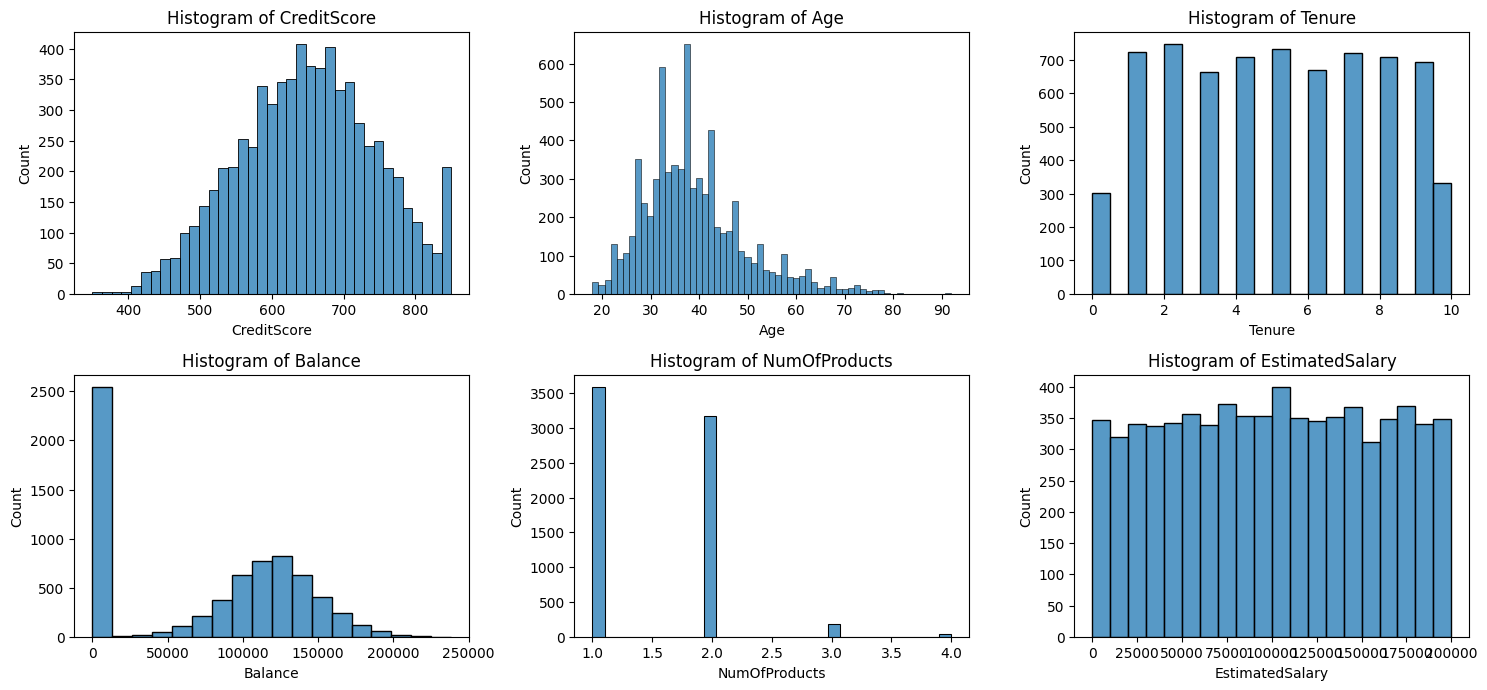

In [94]:
# Create a histrogram for each numerical attribute to check

df = train_clean
attributes=['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x=df[attribute])
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()


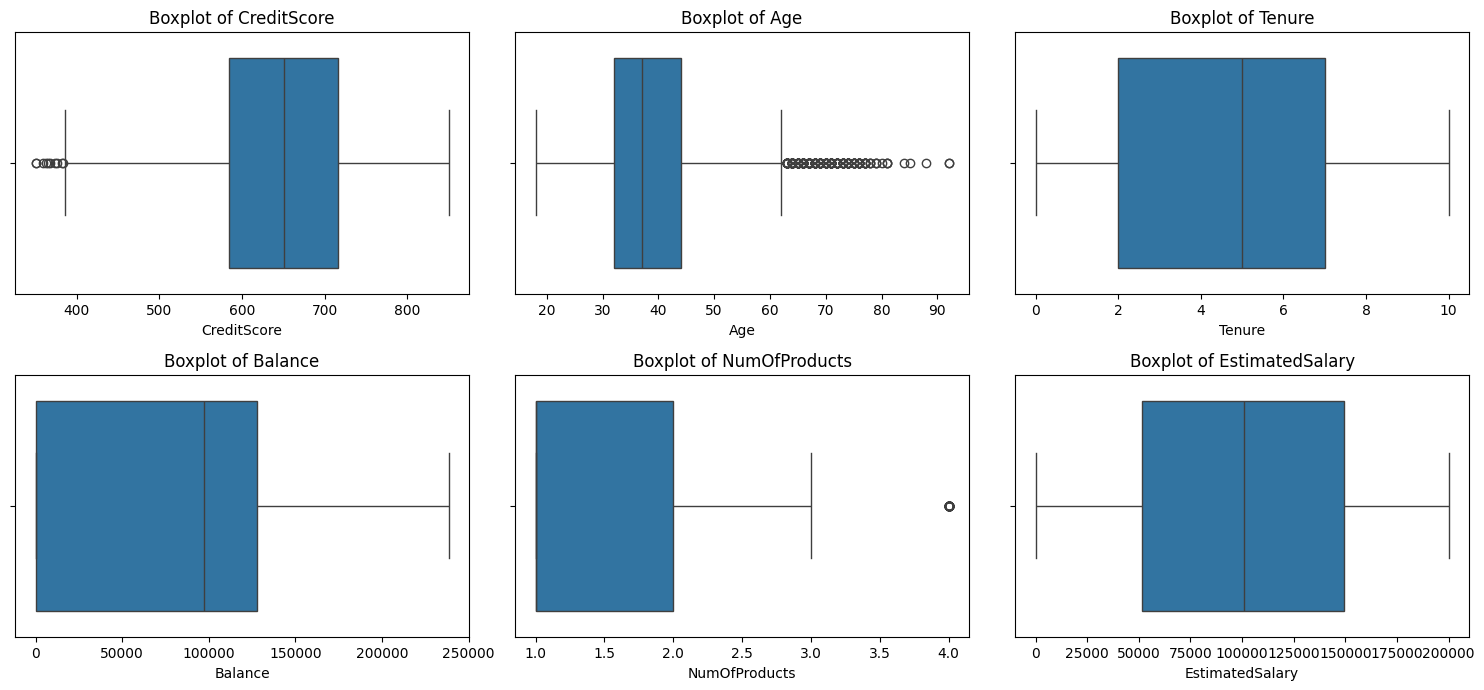

In [95]:
# Create a boxplot for each numerical attribute to check

df = train_clean
attributes=['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[attribute])
    plt.title(f'Boxplot of {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()


### Check for class imbalance problem

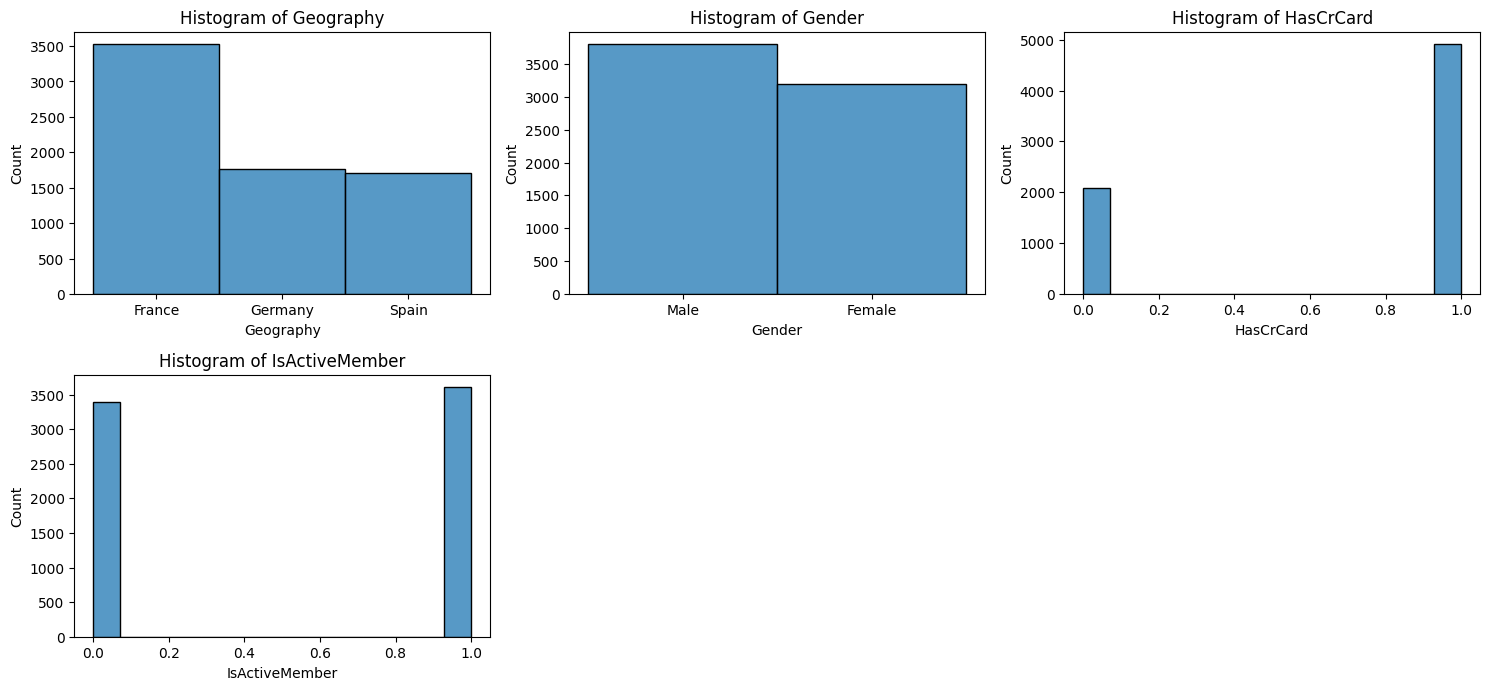

In [96]:
df = train_clean
attributes=[ 'Geography', 'Gender','HasCrCard','IsActiveMember']

plt.figure(figsize=(15, 10))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(x=df[attribute])
    plt.title(f'Histogram of {attribute}')
    plt.xlabel(attribute)

plt.tight_layout()
plt.show()

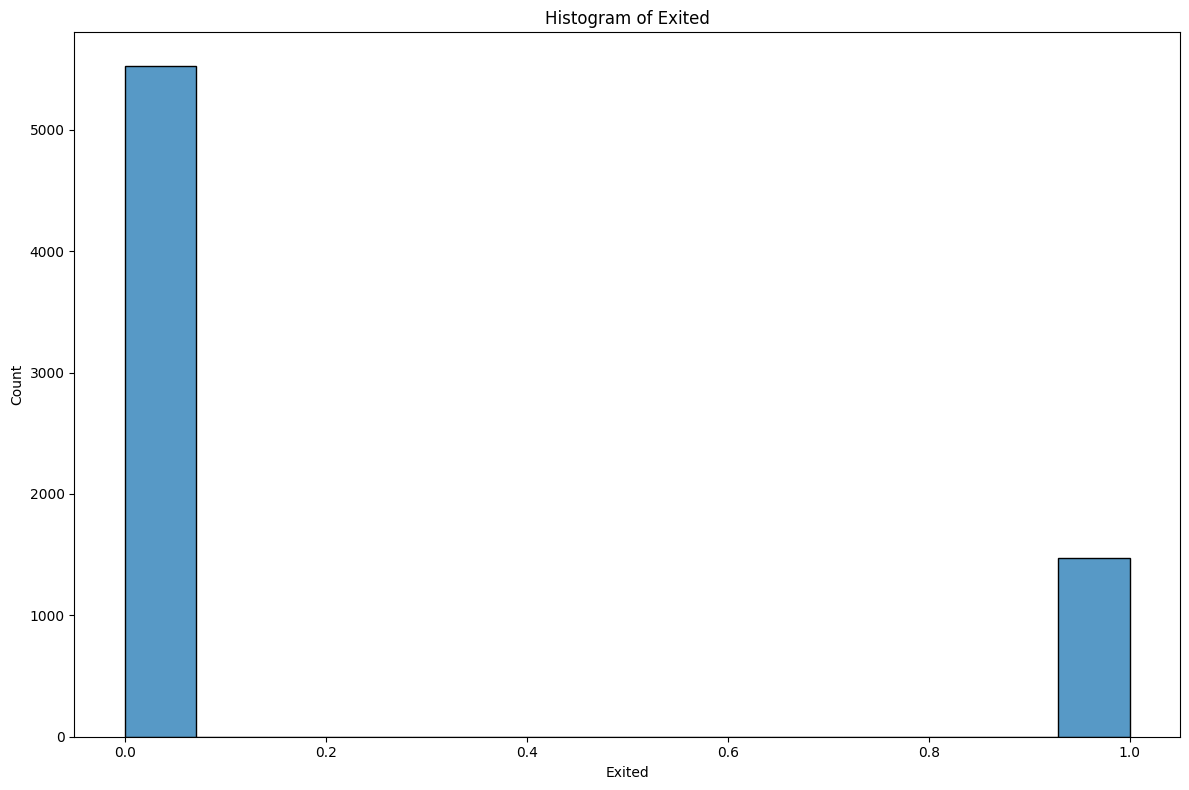

In [97]:
sns.histplot(x=y_train['Exited'])
plt.title(f'Histogram of Exited')
plt.xlabel('Exited')

plt.tight_layout()
plt.show()

In [98]:
print(df["NumOfProducts"].value_counts(normalize=True))
print(df["Geography"].value_counts(normalize=True))
print(df["Gender"].value_counts(normalize=True))
print(df["HasCrCard"].value_counts(normalize=True))
print(df["IsActiveMember"].value_counts(normalize=True))
print(y_train["Exited"].value_counts(normalize=True))



NumOfProducts
1    0.512784
2    0.454221
3    0.026710
4    0.006285
Name: proportion, dtype: float64
Geography
France     0.503500
Germany    0.252678
Spain      0.243822
Name: proportion, dtype: float64
Gender
Male      0.543065
Female    0.456935
Name: proportion, dtype: float64
HasCrCard
1.0    0.701186
0.0    0.298814
Name: proportion, dtype: float64
IsActiveMember
1.0    0.515783
0.0    0.484217
Name: proportion, dtype: float64
Exited
0    0.789459
1    0.210541
Name: proportion, dtype: float64


### Handling categorical variables

In [99]:
# For Geography and Gender, number of products
train_clean1=train_clean
train_clean1 =pd.get_dummies(train_clean1, columns=['Geography', 'Gender'],drop_first = True)

### Transformation

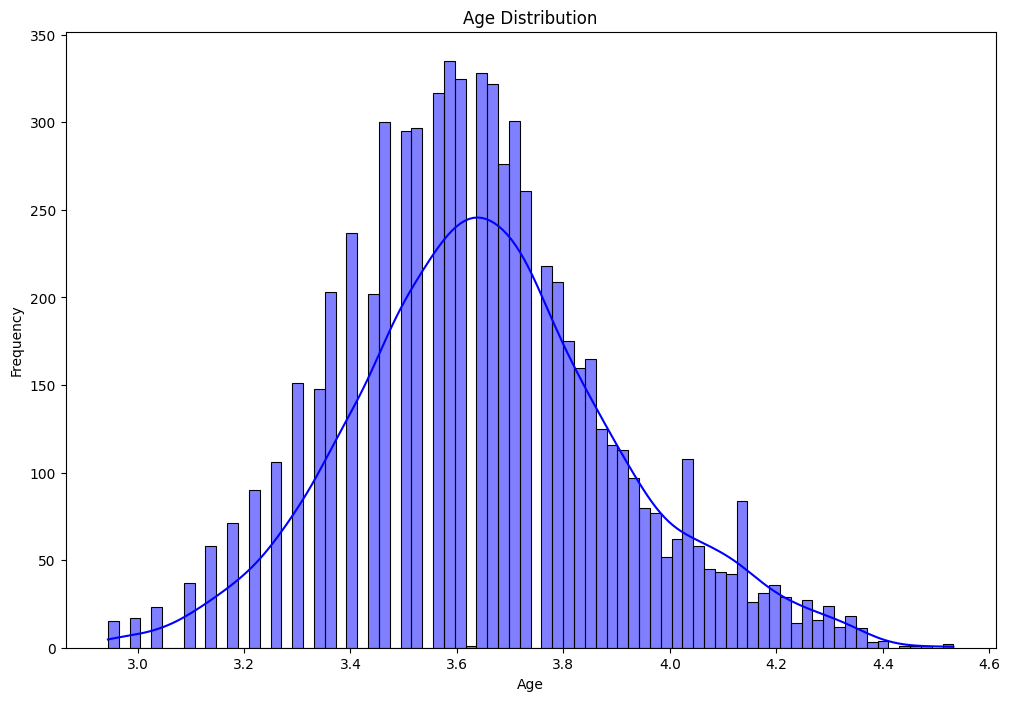

In [100]:
# Apply log transformation for Age
train_clean1['Log_Age'] = np.log(train_clean1['Age'] + 1)

sns.histplot(train_clean1['Log_Age'], bins=78, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [101]:
train_clean1 = train_clean1.drop('Age', axis=1)

### Handling Balance (zero-inflated distribution)(For Logistic regression)

In [102]:
# Yeo-johnson transformation on non-zero balances
pt = PowerTransformer(method='yeo-johnson')

# Fit the transformer only on non-zero values
non_zero_balance = train_clean1['Balance'][train_clean1['Balance'] > 0].values.reshape(-1, 1)
pt.fit(non_zero_balance)

# Transform the balance, keeping zeros as they are
train_clean1['Transformed_Balance'] = train_clean1['Balance']  # Start with original values
train_clean1.loc[train_clean1['Balance'] > 0, 'Transformed_Balance'] = pt.transform(non_zero_balance)


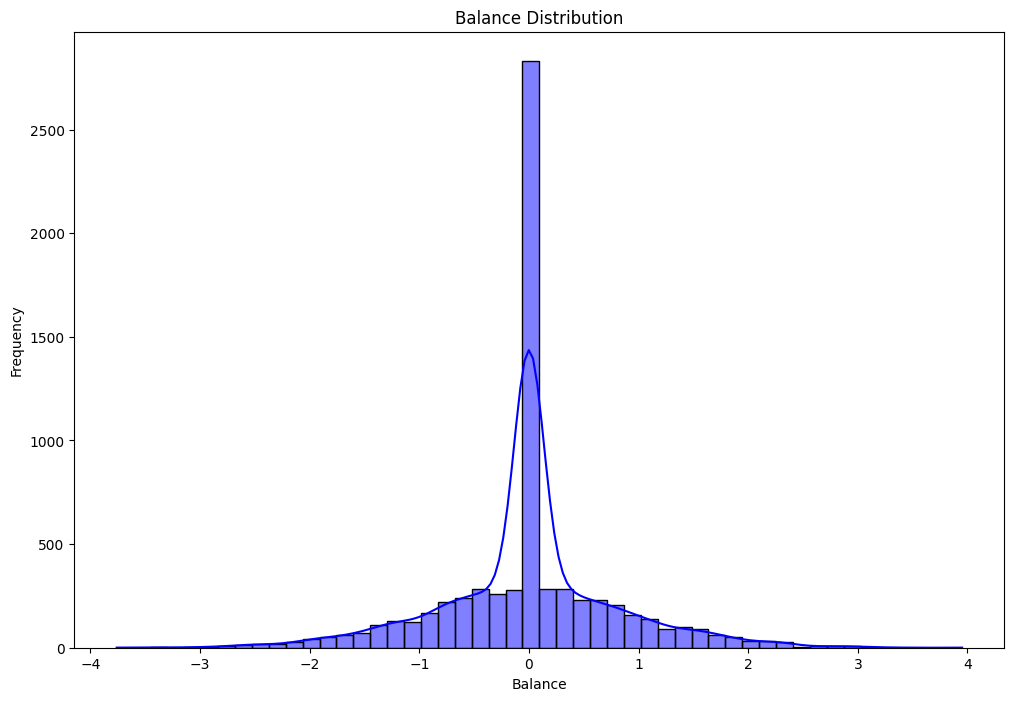

In [103]:
sns.histplot(train_clean1['Transformed_Balance'], bins=50, kde=True, color='blue')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [104]:
train_clean1 = train_clean1.drop('Balance', axis=1)

In [105]:
train_clean1

,CreditScore,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Log_Age,Transformed_Balance
RowNumber,,,,,,,,,,,
2490,714,6,1,1.0,1.0,67057.27,False,False,True,3.367296,0.082403
9922,757,1,1,0.0,0.0,64539.64,True,False,True,3.610918,-1.802334
8119,577,7,1,1.0,0.0,143274.41,False,True,True,3.367296,0.000000
3468,538,1,2,0.0,1.0,94047.75,True,False,False,3.761200,-0.715661
7742,441,1,1,0.0,1.0,174381.23,False,False,True,4.110874,0.675845
...,...,...,...,...,...,...,...,...,...,...,...
1176,719,5,2,1.0,0.0,145759.70,False,True,True,3.688879,0.000000
8448,765,5,1,1.0,1.0,69039.43,False,True,False,3.526361,-1.175098
2935,631,7,1,1.0,1.0,58043.02,False,False,True,3.526361,0.000000


### Correlation analysis

                     CreditScore    Tenure  NumOfProducts  HasCrCard  \
CreditScore             1.000000  0.006916       0.004160  -0.016471   
Tenure                  0.006916  1.000000       0.013047   0.029688   
NumOfProducts           0.004160  0.013047       1.000000  -0.001909   
HasCrCard              -0.016471  0.029688      -0.001909   1.000000   
IsActiveMember          0.010504 -0.029435       0.004322  -0.011227   
EstimatedSalary        -0.001997  0.014493       0.016727  -0.011605   
Geography_Germany       0.004172  0.003127      -0.022181   0.004023   
Geography_Spain         0.001803  0.000973       0.011557  -0.010119   
Gender_Male            -0.001482  0.016084      -0.024935   0.010707   
Log_Age                -0.011180 -0.012890      -0.028053  -0.019830   
Transformed_Balance     0.006094  0.009835      -0.002586   0.007358   

                     IsActiveMember  EstimatedSalary  Geography_Germany  \
CreditScore                0.010504        -0.001997        

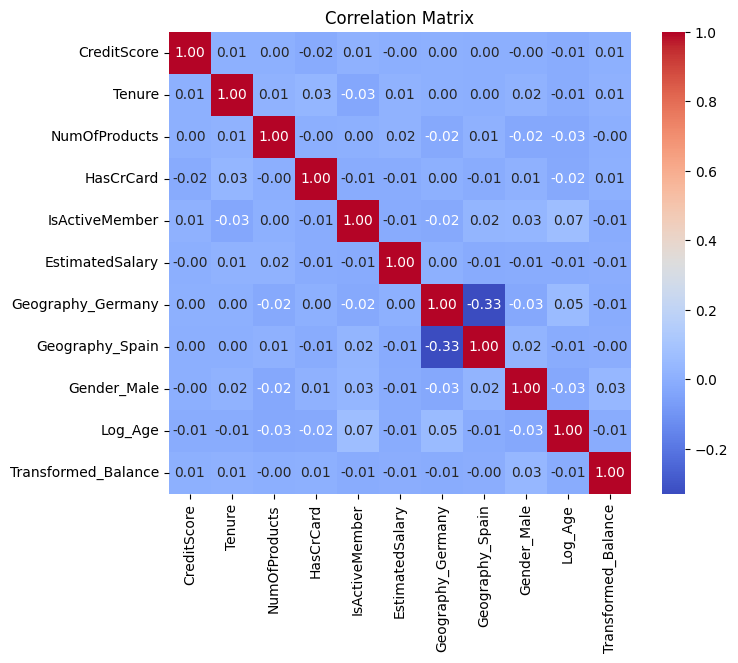

In [106]:
df = train_clean1

correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

### Feature Selection

In [107]:
X_train=train_clean1
X_train

,CreditScore,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Log_Age,Transformed_Balance
RowNumber,,,,,,,,,,,
2490,714,6,1,1.0,1.0,67057.27,False,False,True,3.367296,0.082403
9922,757,1,1,0.0,0.0,64539.64,True,False,True,3.610918,-1.802334
8119,577,7,1,1.0,0.0,143274.41,False,True,True,3.367296,0.000000
3468,538,1,2,0.0,1.0,94047.75,True,False,False,3.761200,-0.715661
7742,441,1,1,0.0,1.0,174381.23,False,False,True,4.110874,0.675845
...,...,...,...,...,...,...,...,...,...,...,...
1176,719,5,2,1.0,0.0,145759.70,False,True,True,3.688879,0.000000
8448,765,5,1,1.0,1.0,69039.43,False,True,False,3.526361,-1.175098
2935,631,7,1,1.0,1.0,58043.02,False,False,True,3.526361,0.000000


## Modelling (Naïve Bayes Classifier)

In [108]:
model = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")


Best Hyperparameters: {'var_smoothing': 1e-09}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [109]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print('CV score:',cv_scores.mean())

CV score: 0.7894586519832771


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

## Evaluation & Final Model (Naïve Bayes Classifier)

### Cleaning the testing data using same method as training data

In [110]:
# Drop unnessary column
test_clean = X_test.drop(columns=['CustomerId','Surname'])

In [111]:
# Deal with missing value
test_clean.fillna({'CreditScore':train_clean['CreditScore'].mean()}, inplace= True)
test_clean.fillna({'Geography':train_clean['Geography'].mode()[0]}, inplace=True)
test_clean.fillna({'Gender':train_clean['Gender'].mode()[0]}, inplace=True)
test_clean.fillna({'Age':train_clean['Age'].mean()}, inplace= True)
test_clean.fillna({'Tenure':train_clean['Tenure'].mode()[0]}, inplace=True)
test_clean.fillna({'Balance':train_clean['Balance'].mean()}, inplace= True)
test_clean.fillna({'NumOfProducts':train_clean['NumOfProducts'].mode()[0]}, inplace=True)
test_clean.fillna({'HasCrCard':train_clean['HasCrCard'].mode()[0]}, inplace=True)
test_clean.fillna({'IsActiveMember':train_clean['IsActiveMember'].mode()[0]}, inplace=True)
test_clean.fillna({'EstimatedSalary':train_clean['EstimatedSalary'].mean()}, inplace= True)

In [112]:
# Handling categorical variables for Geography and Gender
test_clean =pd.get_dummies(test_clean, columns=['Geography', 'Gender'],drop_first = True)

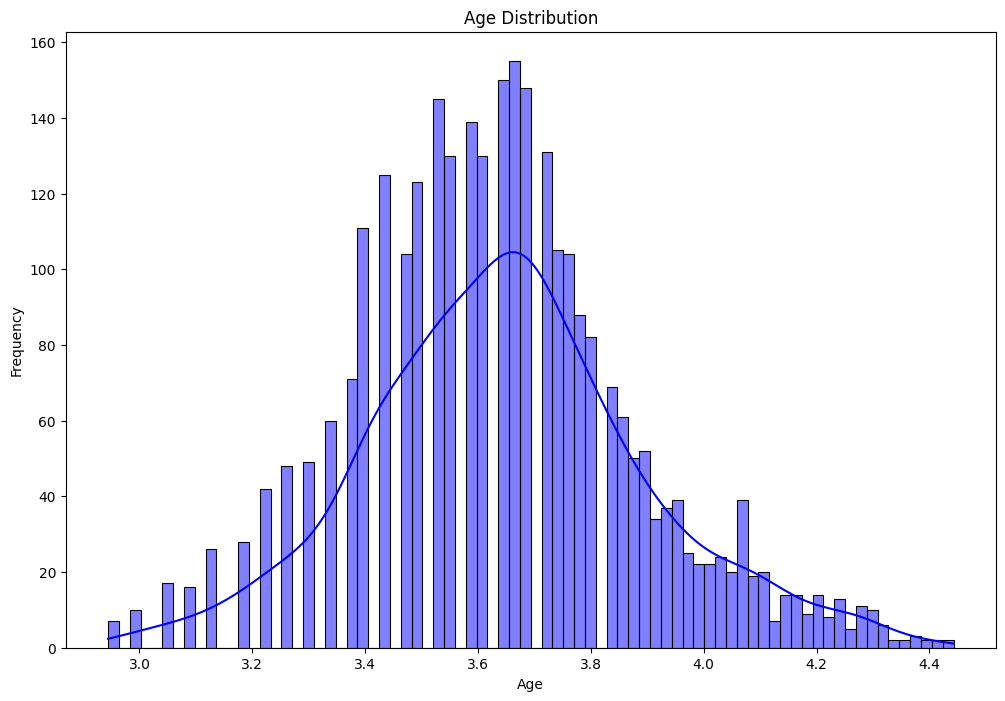

In [113]:
# Apply log transformation for Age
test_clean['Log_Age'] = np.log(test_clean['Age'] + 1)

sns.histplot(test_clean['Log_Age'], bins=78, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [114]:
test_clean = test_clean.drop('Age', axis=1)

In [115]:
# Yeo-johnson transformation on non-zero balances
pt = PowerTransformer(method='yeo-johnson')

# Fit the transformer only on non-zero values
non_zero_balance = test_clean['Balance'][test_clean['Balance'] > 0].values.reshape(-1, 1)
pt.fit(non_zero_balance)

# Transform the balance, keeping zeros as they are
test_clean['Transformed_Balance'] = test_clean['Balance']  # Start with original values
test_clean.loc[test_clean['Balance'] > 0, 'Transformed_Balance'] = pt.transform(non_zero_balance)


In [116]:
test_clean = test_clean.drop('Balance', axis=1)

In [117]:
# Feature normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(test_clean[['CreditScore', 'Tenure', 'EstimatedSalary', 'Log_Age','Transformed_Balance']])

In [118]:
X_test=test_clean
X_test

,CreditScore,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Log_Age,Transformed_Balance
RowNumber,,,,,,,,,,,
3557,590,6,1,1.0,0.0,88206.04,False,False,False,4.110874,0.963245
5893,588,3,1,1.0,0.0,94498.82,True,False,True,3.583519,-0.484522
9999,772,3,2,1.0,0.0,92888.52,True,False,True,3.761200,-1.499971
4223,850,6,1,1.0,0.0,136985.08,False,False,True,3.713572,0.000000
4891,552,4,2,1.0,0.0,140286.69,False,True,False,3.555348,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3733,722,6,1,1.0,1.0,93917.68,False,False,True,3.850148,0.000000
8346,568,3,2,1.0,1.0,29372.62,False,True,False,3.850148,0.000000
8663,510,4,1,1.0,0.0,28461.29,True,False,False,3.806662,0.146906


### Evaluate the model using the test set

In [119]:
y_pred = best_model.predict(X_test)
print("Accuracy from 30% test data:",accuracy_score(y_test, y_pred),"\n")
print("Confusion matrix from 30% test data:\n",confusion_matrix(y_test, y_pred),"\n")
print("Classification_report:\n", classification_report(y_test, y_pred))

Accuracy from 30% test data: 0.8120626457847384 

Confusion matrix from 30% test data:
 [[2437    0]
 [ 564    0]] 

Classification_report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      2437
           1       0.00      0.00      0.00       564

    accuracy                           0.81      3001
   macro avg       0.41      0.50      0.45      3001
weighted avg       0.66      0.81      0.73      3001



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [120]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

print("AUC Score:", auc_score)

AUC Score: 0.6456679966357892


### Final model

In [121]:
combined_X = pd.concat([X_train, X_test], axis=0)
combined_y = pd.concat([y_train, y_test], axis=0)

In [122]:
# Fit the Final model with all training data and testing data
final_model = grid_search.best_estimator_
final_model.fit(combined_X, combined_y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

# Neural Network

In [123]:
# Adjust path if needed
dataset = pd.read_csv('Churn_Modelling.csv')

# Quick peek
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [124]:
dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [131]:
X = dataset.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = dataset['Exited']

In [132]:

cat_cols = ['Geography', 'Gender']
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
], remainder='passthrough')

X_enc = ct.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_enc)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (8001, 12), Test shape: (2001, 12)


In [133]:
def build_baseline():
    """2 hidden layers: 16 → 8 units"""
    m = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8,  activation='relu'),
        Dense(1,  activation='sigmoid')
    ])
    return m

def build_deep():
    """Deeper: 64 → 32 → 16 → 8"""
    m = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8,  activation='relu'),
        Dense(1,  activation='sigmoid')
    ])
    return m

def build_wide():
    """Wider: 128 → 64"""
    m = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64,  activation='relu'),
        Dense(1,   activation='sigmoid')
    ])
    return m

def build_dropout():
    """With Dropout for regularization"""
    m = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1,  activation='sigmoid')
    ])
    return m

def build_l2():
    """L2‑regularized Dense layers"""
    m = Sequential([
        Dense(64, activation='relu', kernel_regularizer=l2(0.01),
              input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1,  activation='sigmoid')
    ])
    return m

# Map names → builder functions
models = {
    'Baseline':       build_baseline,
    'Deep':           build_deep,
    'Wide':           build_wide,
    'Dropout':        build_dropout,
    'L2-Regularized': build_l2,
}


In [137]:
results   = []
histories = {}
trained_models = {}

for name, build_fn in models.items():
    print(f"Training {name}...")
    m = build_fn()
    m.compile(
        optimizer=Adam(1e-3),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name='auc')
        ]
    )

    hist = m.fit(
        X_train, y_train,
        validation_split=0.10,
        epochs=30,
        batch_size=32,
        verbose=0
    )

    # Evaluate and pull out both metrics by name
    metrics = m.evaluate(X_test, y_test, verbose=0, return_dict=True)
    results.append({
        'Model':      name,
        'Test Accuracy': metrics['accuracy'],
        'Test AUC':      metrics['auc']
    })
    histories[name] = hist
    trained_models[name] = m

# Convert to DataFrame
df_results = pd.DataFrame(results)
df_results


Training Baseline...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Deep...
Training Wide...
Training Dropout...
Training L2-Regularized...


,Model,Test Accuracy,Test AUC
0,Baseline,0.862069,0.851213
1,Deep,0.849575,0.830395
2,Wide,0.857071,0.844644
3,Dropout,0.859570,0.856975
4,L2-Regularized,0.859070,0.854641


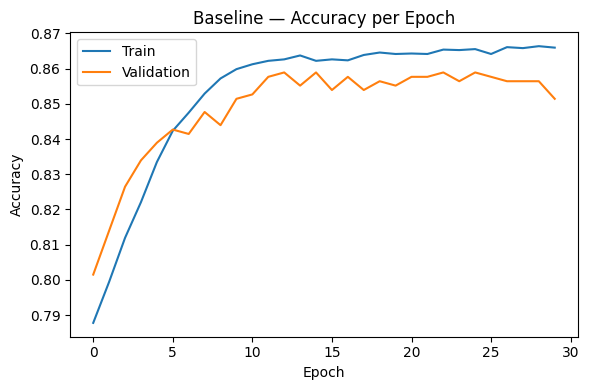

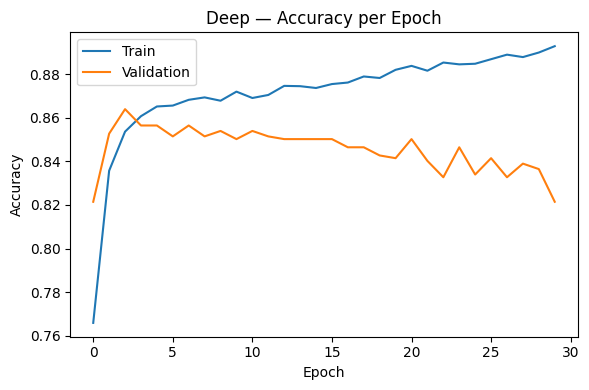

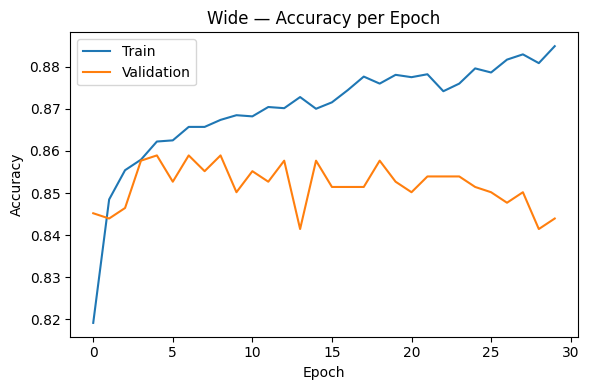

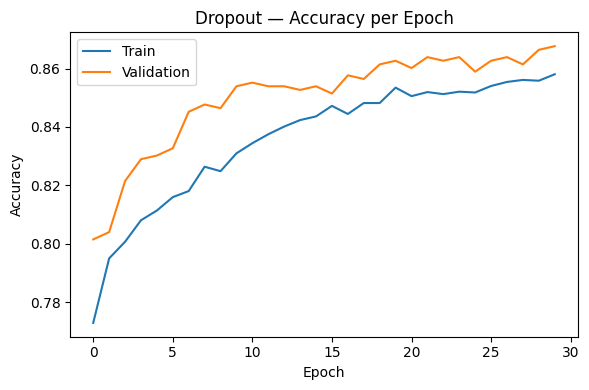

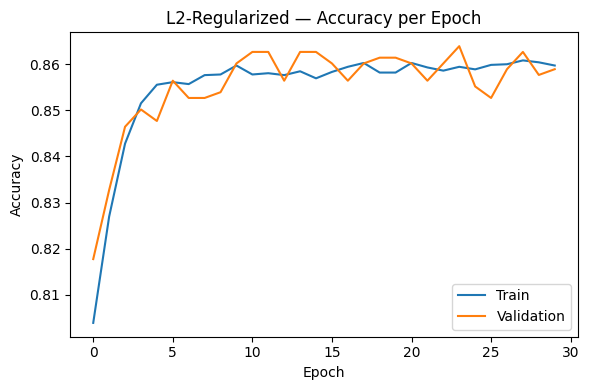

In [138]:
for name, hist in histories.items():
    plt.figure(figsize=(6,4))
    plt.plot(hist.history['accuracy'],    label='Train')
    plt.plot(hist.history['val_accuracy'], label='Validation')
    plt.title(f'{name} — Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


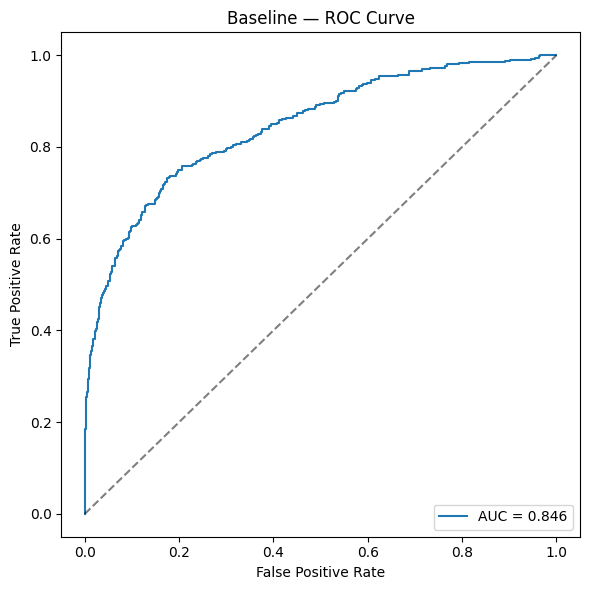

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


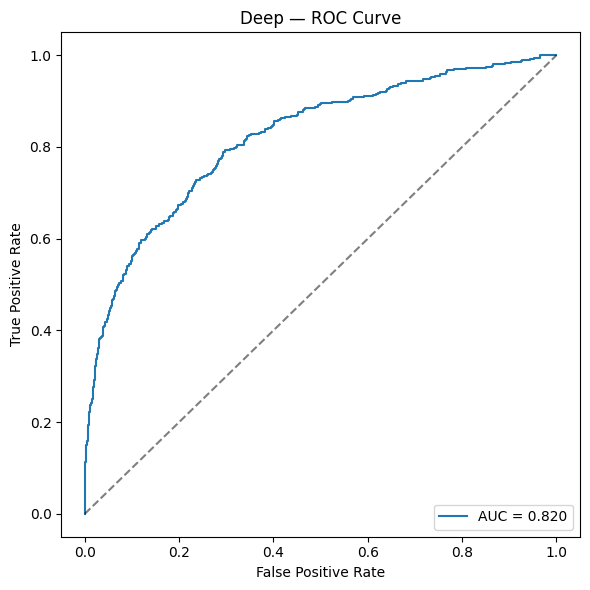

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


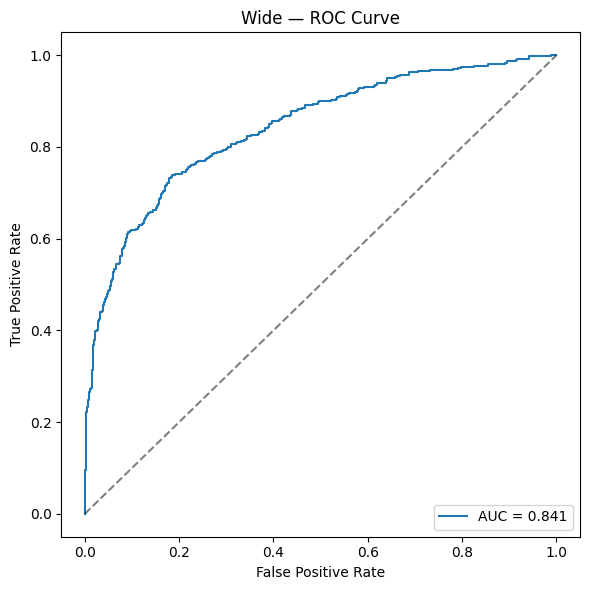

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


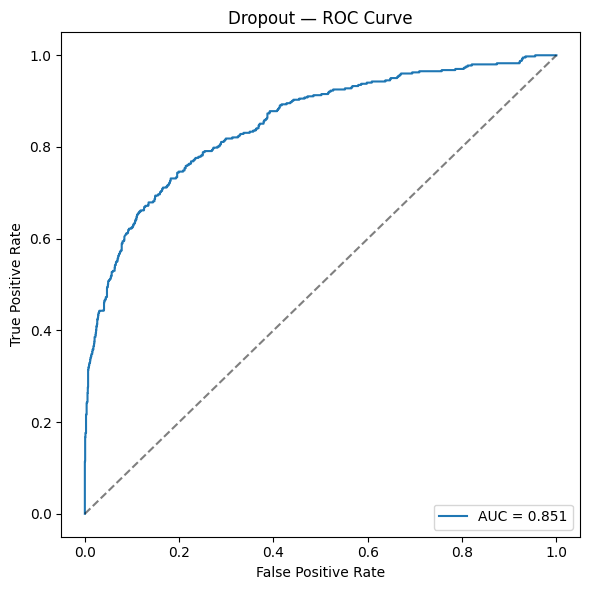

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


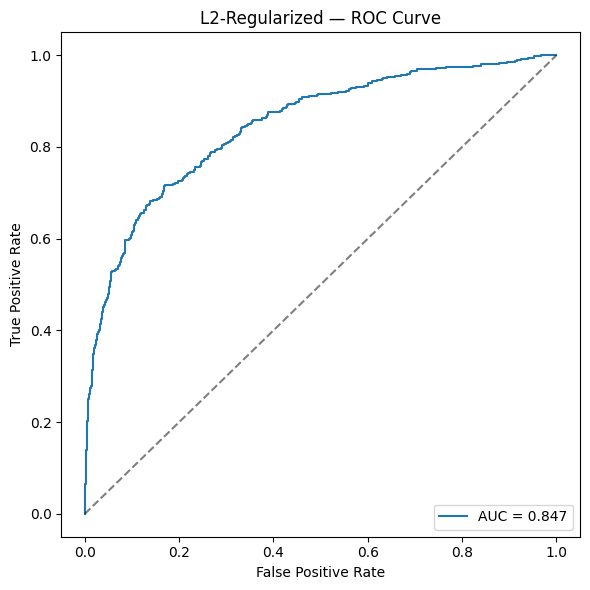

In [140]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer


imputer   = SimpleImputer(strategy='median')
scaler    = StandardScaler()
pt        = PowerTransformer()


X_train_imp = imputer.fit_transform(X_train)
X_train_sc  = scaler.fit_transform(X_train_imp)
X_train_pt  = pt.fit_transform(X_train_sc)

X_test_imp  = imputer.transform(X_test)
X_test_sc   = scaler.transform(X_test_imp)
X_test_pt   = pt.transform(X_test_sc)


from sklearn.metrics import roc_curve, roc_auc_score

for name, model in trained_models.items():

    y_prob = model.predict(X_test_pt).ravel()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score   = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
    plt.plot([0,1], [0,1], 'k--', alpha=0.5)
    plt.title(f'{name} — ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()


# Random Forest with Feature Importance

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('Churn_Modelling.csv')

print("First 5 Rows:\n", df.head())
print("\nData Info:\n", df.info())
print("\nDescriptive Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

print("\nUnique values in Geography:", df['Geography'].unique())
print("Unique values in Gender:", df['Gender'].unique())

for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].median())

print("\nMissing Values after imputation:\n", df.isnull().sum())

for column in ['Geography', 'Gender']:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 60, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
df['Balance_Salary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)

df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Age_Group'], drop_first=True)

features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
            'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Age_Group_Adult', 'Age_Group_Middle-Aged', 'Age_Group_Senior',
            'Balance_Salary_Ratio','NumOfProducts']
X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_distributions = {
    'n_estimators': stats.randint(50, 151),
    'max_depth': stats.randint(3, 8),
    'min_samples_split': stats.randint(2, 6),
    'min_samples_leaf': stats.randint(1, 4),
    'class_weight': ['balanced', 'balanced_subsample', None]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                  param_distributions=param_distributions,
                                  n_iter=15,
                                  scoring='roc_auc',
                                  cv=3,
                                  n_jobs=-1,
                                  verbose=1)

random_search.fit(X_train, y_train)

print("\nBest Parameters:", random_search.best_params_)
print("Best ROC AUC Score:", random_search.best_score_)

best_rf = random_search.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Mean Squared Error:", mse)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

importances = best_rf.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]
sorted_feature_names = feature_names[indices]

num_features_to_plot = min(10, len(feature_names))
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
sns.barplot(x=importances[indices[:num_features_to_plot]], y=sorted_feature_names[:num_features_to_plot], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top Feature Importances")
plt.show()

New Code:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Data Loading and Inspection
df = pd.read_csv('Churn_Modelling.csv')

# 2. Data Cleaning and Missing Data Handling
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].median())


for column in ['Geography', 'Gender']:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 60, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
df['Balance_Salary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)

df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Age_Group'], drop_first=True)

features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
            'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Age_Group_Adult', 'Age_Group_Middle-Aged', 'Age_Group_Senior',
            'Balance_Salary_Ratio','NumOfProducts']

X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Learning Algorithm Selection and Hyperparameter Tuning (Random Forest)
param_distributions = {
    'n_estimators': stats.randint(50, 151),
    'max_depth': stats.randint(3, 8),
    'min_samples_split': stats.randint(2, 6),
    'min_samples_leaf': stats.randint(1, 4),
    'class_weight': ['balanced', 'balanced_subsample', None]
}

random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                  param_distributions=param_distributions,
                                  n_iter=15,
                                  scoring='roc_auc',
                                  cv=3,
                                  n_jobs=-1,
                                  verbose=1)

random_search.fit(X_train, y_train)

print("\nBest Parameters (All Features):", random_search.best_params_)
print("Best ROC AUC Score (All Features):", random_search.best_score_)

best_rf = random_search.best_estimator_

# Evaluate the model
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nEvaluation Metrics (All Features):")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Mean Squared Error:", mse)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# 7. Get Selected Features Based on Feature Importance
importances = best_rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
sorted_feature_names = feature_names[indices]

# Select top N features
num_selected_features = 5
selected_features = sorted_feature_names[:num_selected_features]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 8. Train a New Random Forest with Selected Features
param_distributions_selected = {
    'n_estimators': stats.randint(50, 151),
    'max_depth': stats.randint(3, 8),
    'min_samples_split': stats.randint(2, 6),
    'min_samples_leaf': stats.randint(1, 4),
    'class_weight': ['balanced', 'balanced_subsample', None]
}

random_search_selected = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                           param_distributions=param_distributions_selected,
                                           n_iter=15,
                                           scoring='roc_auc',
                                           cv=3,
                                           n_jobs=-1,
                                           verbose=1)

random_search_selected.fit(X_train_selected, y_train)

print("\nBest Parameters (Selected Features):", random_search_selected.best_params_)
print("Best ROC AUC Score (Selected Features):", random_search_selected.best_score_)

best_rf_selected = random_search_selected.best_estimator_

# 9. Evaluate the New Model
y_pred_selected = best_rf_selected.predict(X_test_selected)
y_proba_selected = best_rf_selected.predict_proba(X_test_selected)[:, 1]

accuracy_selected = accuracy_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_proba_selected)
fpr_selected, tpr_selected, thresholds_selected = roc_curve(y_test, y_proba_selected)
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
class_report_selected = classification_report(y_test, y_pred_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)

print("\nEvaluation Metrics (Selected Features):")
print("Accuracy:", accuracy_selected)
print("ROC AUC:", roc_auc_selected)
print("Mean Squared Error:", mse_selected)
print("\nConfusion Matrix:\n", conf_matrix_selected)
print("\nClassification Report (Selected Features):\n", class_report_selected)

# ROC Curve with all features
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'All Features ROC AUC = {roc_auc:.2f}')

# ROC Curve with selected features
plt.plot(fpr_selected, tpr_selected, label=f'Selected Features ROC AUC = {roc_auc_selected:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Feature Importance Plot (All Features)
importances = best_rf.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)[::-1]
sorted_feature_names = feature_names[indices]

num_features_to_plot = min(10, len(feature_names))
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
sns.barplot(x=importances[indices[:num_features_to_plot]], y=sorted_feature_names[:num_features_to_plot], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top Feature Importances (All Features)")
plt.show()

# Decision Tree 2 with Different data handling and extra Feature Selection (Embedded method: SelectFromModel)

In [ ]:

# 1. Data Loading and Inspection
df = pd.read_csv('Churn_Modelling.csv')

print("First 5 Rows:\n", df.head())
print("\nData Info:\n", df.info())
print("\nDescriptive Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

print("\nUnique values in Geography:", df['Geography'].unique())
print("Unique values in Gender:", df['Gender'].unique())

# 2. Data Cleaning and Missing Data Handling
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].median())

print("\nMissing Values after imputation:\n", df.isnull().sum())

for column in ['Geography', 'Gender']:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 60, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
df['Balance_Salary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)

df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Age_Group'], drop_first=True)

features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
            'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'Age_Group_Adult', 'Age_Group_Middle-Aged', 'Age_Group_Senior',
            'Balance_Salary_Ratio']

X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. Learning Algorithm Selection and Hyperparameter Tuning (Decision Tree)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

best_dt = grid_search.best_estimator_


# Feature Selection using SelectFromModel
selector = SelectFromModel(best_dt, prefit=True, max_features=5, threshold=-np.inf)
X_selected = selector.transform(X)

# Update the feature names after selection
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

# Split the selected features for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Re-run GridSearchCV with the selected features
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

best_dt = grid_search.best_estimator_

# Model Evaluation
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Mean Squared Error:", mse)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance
importances = best_dt.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
num_features_to_plot = min(10, len(selected_feature_names))
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
sns.barplot(x=importances[sorted_indices][:num_features_to_plot], y=selected_feature_names[sorted_indices][:num_features_to_plot], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top Feature Importances")
plt.show()

# Logistic Regression with Model/Feature Selection

In [ ]:
# 1. Data Loading and Inspection
df = pd.read_csv('Churn_Modelling.csv')

print("First 5 Rows:\n", df.head())
print("\nData Info:\n", df.info())
print("\nDescriptive Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

print("\nUnique values in Geography:", df['Geography'].unique())
print("Unique values in Gender:", df['Gender'].unique())

# 2. Data Cleaning and Missing Data Handling
for column in df.columns:
    if df[column].isnull().any():
        if df[column].dtype == 'object':
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            df[column] = df[column].fillna(df[column].median())

print("\nMissing Values after imputation:\n", df.isnull().sum())

for column in ['Geography', 'Gender']:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 40, 60, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
df['Balance_Salary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)

df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Age_Group'], drop_first=True)

features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
            'Geography_Spain', 'Gender_Male', 'Age_Group_Adult',
            'Age_Group_Middle-Aged', 'Age_Group_Senior', 'Balance_Salary_Ratio']

X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Feature Selection
logistic_selector = LogisticRegression(penalty='l1', solver='liblinear',
                                       random_state=42, class_weight='balanced', C=0.1)
logistic_selector.fit(X_train_scaled, y_train)

# Select features based on Logistic Regression coefficients
sfm = SelectFromModel(logistic_selector, prefit=True, max_features=5)
X_train_selected = sfm.transform(X_train_scaled)
X_test_selected = sfm.transform(X_test_scaled)

selected_features_indices = sfm.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

print("\nSelected Features:\n", selected_features)

# 5. Learning Algorithm Selection and Hyperparameter Tuning (Logistic Regression)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000),
                           param_grid=param_grid, scoring='roc_auc',
                           cv=3, n_jobs=-1, verbose=1)

grid_search.fit(X_train_selected, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)

best_lr = grid_search.best_estimator_

# 6. Model Evaluation
y_pred = best_lr.predict(X_test_selected)
y_proba = best_lr.predict_proba(X_test_selected)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("Mean Squared Error:", mse)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance (Magnitude of Coefficients)
importances = best_lr.coef_[0]
indices = np.argsort(np.abs(importances))[::-1]  # Sort in descending order by absolute value

sorted_feature_names = selected_features[indices]  # Ensure feature_names is from the selected features

num_features_to_plot = min(10, len(sorted_feature_names))
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Logistic Regression)")
sns.barplot(x=importances[indices[:num_features_to_plot]],
            y=sorted_feature_names[indices[:num_features_to_plot]], palette="viridis")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top Feature Importances")
plt.show()